# **0. Introduction**
This notebook create different pipelines for machine learning models

In [1]:
# Import libraries

# Data Manipulation
import pandas as pd
import numpy as np

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from matplotlib.gridspec import GridSpec

# Data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.feature_extraction import FeatureHasher
from sklearn.compose import ColumnTransformer

# Data splitting
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold

# Feature Selection
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier

# Models
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import math
import torch as th
from torch import Tensor
from torch.nn.parameter import Parameter

from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier , IsolationForest , AdaBoostClassifier , BaggingClassifier
from sklearn.tree import DecisionTreeClassifier , ExtraTreeClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Feature Selection
from xgboost import XGBClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFECV
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

# Oversampling
from imblearn.over_sampling import SMOTE , SMOTENC , ADASYN , BorderlineSMOTE , KMeansSMOTE ,SVMSMOTE , RandomOverSampler
from imblearn.combine import SMOTETomek

# Undersampling
from imblearn.under_sampling import RandomUnderSampler , TomekLinks

# Metrics
from sklearn.metrics import confusion_matrix , f1_score , precision_score , recall_score , make_scorer
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score , precision_recall_curve, average_precision_score , accuracy_score
from sklearn.model_selection import cross_val_score

# Hyperparameter optimization
from sklearn.model_selection import GridSearchCV

# Data imputation
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

# Feature importance
import shap

# Genetic Algorithm
from deap import base, creator, tools, algorithms

# Utils
from itertools import product
import json
import time
import warnings
import pickle
import joblib
from scipy.interpolate import make_interp_spline
from scipy.interpolate import interp1d
import pickle as pkl
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline
import random
warnings.filterwarnings("ignore")
from statsmodels.stats.contingency_tables import mcnemar
from scipy.stats import ttest_rel
# Set Numpy Seed
np.random.seed(0)
#plt.style.use('ggplot')
print('Libraries imported.')

Libraries imported.


# **1. Data Loading and basic preprocessing**

In [2]:
# Load data
input_path = r'..\data'
input_filename = r'\reduced_op_UK_merged_data_final_21062024.csv'
df = pd.read_csv(input_path + input_filename , decimal = '.' , sep = ';')
df

,record_id,data_group,sex,age,bmi,active_smoking,pack_years,alcohol_abuse,real_function_ckd_stages,preoperative_hemoglobin_level,...,approach,conversion,type_of_anastomosis -> das von UK sind alles Ileocolonic anastomosis,anastomotic_technique,anastomotic_configuration,protective_stomy,surgeon_experience,anastomotic_leackage,BIHistoryOfIschaemicHeartDisease,BIHistoryOfDiabetes
0,5921,clarunisclaraspita,1.0,87.0,NaN,1.0,25.0,2.0,5.0,9.6,...,1.0,NaN,3.0,2.0,1.0,3.0,1.0,0,0,0
1,59231,clarunisclaraspita,1.0,53.0,19.2,1.0,35.0,3.0,1.0,11.3,...,3.0,NaN,3.0,1.0,3.0,3.0,1.0,0,0,0
2,592-82,clarunisclaraspita,2.0,71.0,18.8,0.0,NaN,3.0,1.0,13.7,...,3.0,0.0,3.0,NaN,1.0,3.0,1.0,0,0,0
3,592-92,clarunisclaraspita,1.0,39.0,22.4,0.0,0.0,3.0,2.0,11.9,...,3.0,0.0,3.0,1.0,3.0,3.0,1.0,0,0,0
4,59251,clarunisclaraspita,1.0,67.0,17.2,1.0,75.0,3.0,1.0,7.7,...,3.0,NaN,3.0,1.0,3.0,3.0,1.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5906,473-772,university_wrzburg,2.0,24.0,20.4,0.0,NaN,3.0,1.0,13.6,...,1.0,NaN,3.0,2.0,2.0,3.0,1.0,0,0,0
5907,473-806,university_wrzburg,2.0,87.0,32.0,0.0,NaN,3.0,4.0,NaN,...,3.0,NaN,3.0,2.0,2.0,3.0,1.0,0,0,0
5908,473-808,university_wrzburg,2.0,74.0,22.7,1.0,20.0,3.0,1.0,9.7,...,3.0,NaN,3.0,1.0,3.0,3.0,1.0,0,0,1
5909,473-830,university_wrzburg,1.0,85.0,24.3,0.0,NaN,3.0,2.0,13.2,...,3.0,NaN,3.0,2.0,2.0,3.0,1.0,0,0,0


In [3]:
# Show group distribution
df['data_group'].value_counts()

uk                    3041
university_wrzburg     647
university_dalhous     340
university_of_east     314
military_universit     294
university_vilnius     234
university_basel       226
university_hamburg     220
university_las_veg     173
kantonspital_liest     106
universitt_innsbru     103
gzo_wetzikon            90
emmental_hospital       67
clarunisclaraspita      56
Name: data_group, dtype: int64

In [4]:
# Save total of data groups
clinics = df['data_group'].unique().tolist()
clinics

['clarunisclaraspita',
 'emmental_hospital',
 'gzo_wetzikon',
 'kantonspital_liest',
 'military_universit',
 'uk',
 'universitt_innsbru',
 'university_basel',
 'university_dalhous',
 'university_hamburg',
 'university_las_veg',
 'university_of_east',
 'university_vilnius',
 'university_wrzburg']

In [5]:
# Print columns of the data
df.columns.tolist()

['record_id',
 'data_group',
 'sex',
 'age',
 'bmi',
 'active_smoking',
 'pack_years',
 'alcohol_abuse',
 'real_function_ckd_stages',
 'preoperative_hemoglobin_level',
 'preoperative_leukocyte_count',
 'preoperative_albumin_level',
 'preoperative_crp_level',
 'liver_metastasis_at_time_of_anastomosis',
 'neoadjuvant_therapy',
 'preoperative_use_of_immunosuppressive_drugs',
 'preoperative_steroid_use',
 'dosage_of_steroids',
 'preoperative_nsaids_use',
 'preoperative_blood_transfusion',
 'tnf_alpha_inhib',
 'asa_score',
 'prior_abdominal_surgery',
 'indication',
 'operation',
 'emergency_surgery',
 'perforation',
 'approach',
 'conversion',
 'type_of_anastomosis -> das von UK sind alles  Ileocolonic anastomosis',
 'anastomotic_technique',
 'anastomotic_configuration',
 'protective_stomy',
 'surgeon_experience',
 'anastomotic_leackage',
 'BIHistoryOfIschaemicHeartDisease',
 'BIHistoryOfDiabetes']

In [6]:
# Drop columns to omit
drop_columns = ['record_id']
df = df.drop(columns = drop_columns)

In [7]:
# Define target variable
TARGET = ['anastomotic_leackage']

In [8]:
# Encode data_group column
if 'data_group' in df.columns.tolist():
    clinics_2 = df['data_group'].unique().tolist()
    code_clinics = {v : k for k , v in enumerate(clinics_2)}
    df['data_group_encoded'] = df['data_group'].map(code_clinics)
    df = df.drop(columns = ['data_group'])

df

,sex,age,bmi,active_smoking,pack_years,alcohol_abuse,real_function_ckd_stages,preoperative_hemoglobin_level,preoperative_leukocyte_count,preoperative_albumin_level,...,conversion,type_of_anastomosis -> das von UK sind alles Ileocolonic anastomosis,anastomotic_technique,anastomotic_configuration,protective_stomy,surgeon_experience,anastomotic_leackage,BIHistoryOfIschaemicHeartDisease,BIHistoryOfDiabetes,data_group_encoded
0,1.0,87.0,NaN,1.0,25.0,2.0,5.0,9.6,6.4,0.0,...,NaN,3.0,2.0,1.0,3.0,1.0,0,0,0,0
1,1.0,53.0,19.2,1.0,35.0,3.0,1.0,11.3,12.4,0.0,...,NaN,3.0,1.0,3.0,3.0,1.0,0,0,0,0
2,2.0,71.0,18.8,0.0,NaN,3.0,1.0,13.7,9.0,0.0,...,0.0,3.0,NaN,1.0,3.0,1.0,0,0,0,0
3,1.0,39.0,22.4,0.0,0.0,3.0,2.0,11.9,8.8,0.0,...,0.0,3.0,1.0,3.0,3.0,1.0,0,0,0,0
4,1.0,67.0,17.2,1.0,75.0,3.0,1.0,7.7,8.6,0.0,...,NaN,3.0,1.0,3.0,3.0,1.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5906,2.0,24.0,20.4,0.0,NaN,3.0,1.0,13.6,4.9,NaN,...,NaN,3.0,2.0,2.0,3.0,1.0,0,0,0,13
5907,2.0,87.0,32.0,0.0,NaN,3.0,4.0,NaN,NaN,NaN,...,NaN,3.0,2.0,2.0,3.0,1.0,0,0,0,13
5908,2.0,74.0,22.7,1.0,20.0,3.0,1.0,9.7,9.2,NaN,...,NaN,3.0,1.0,3.0,3.0,1.0,0,0,1,13
5909,1.0,85.0,24.3,0.0,NaN,3.0,2.0,13.2,4.7,NaN,...,NaN,3.0,2.0,2.0,3.0,1.0,0,0,0,13


In [9]:
# Define categorical and numerical features
# Define numeric and categorical columns
num_columns = ['age' , 'bmi' , 'pack_years' , 'preoperative_hemoglobin_level' , 'preoperative_leukocyte_count',
              'preoperative_albumin_level' , 'preoperative_crp_level' , 'dosage_of_steroids']
num_columns = [i for i in num_columns if i in df.columns.tolist()]
ordinal_columns = ['real_function_ckd_stages' , 'charlson_comorbidity_index' ,
                  'asa_score' , 'surgeon_experience']
ordinal_columns = [i for i in ordinal_columns if i in df.columns.tolist()]
cat_columns = df.drop(columns = num_columns + TARGET + ordinal_columns).columns.tolist()
cat_columns

['sex',
 'active_smoking',
 'alcohol_abuse',
 'liver_metastasis_at_time_of_anastomosis',
 'neoadjuvant_therapy',
 'preoperative_use_of_immunosuppressive_drugs',
 'preoperative_steroid_use',
 'preoperative_nsaids_use',
 'preoperative_blood_transfusion',
 'tnf_alpha_inhib',
 'prior_abdominal_surgery',
 'indication',
 'operation',
 'emergency_surgery',
 'perforation',
 'approach',
 'conversion',
 'type_of_anastomosis -> das von UK sind alles  Ileocolonic anastomosis',
 'anastomotic_technique',
 'anastomotic_configuration',
 'protective_stomy',
 'BIHistoryOfIschaemicHeartDisease',
 'BIHistoryOfDiabetes',
 'data_group_encoded']

In [10]:
# Remove features with more than N% of missing
percent_of_missing = pd.DataFrame((df.replace(-1 , np.nan).isnull().sum() / df.shape[0]).sort_values(ascending = False))
print(percent_of_missing)
to_drop_missing_columns = percent_of_missing[percent_of_missing[0] > 0.3].index.tolist()
print('Columns deleted by missing values:' , to_drop_missing_columns)
df = df.drop(columns = to_drop_missing_columns)
df

                                                           0
pack_years                                          0.703265
preoperative_albumin_level                          0.669768
liver_metastasis_at_time_of_anastomosis             0.588733
tnf_alpha_inhib                                     0.582643
preoperative_nsaids_use                             0.577736
real_function_ckd_stages                            0.570969
preoperative_leukocyte_count                        0.566402
alcohol_abuse                                       0.553037
protective_stomy                                    0.536457
preoperative_blood_transfusion                      0.507528
dosage_of_steroids                                  0.506513
preoperative_use_of_immunosuppressive_drugs         0.460497
preoperative_steroid_use                            0.459313
perforation                                         0.416173
conversion                                          0.402977
preoperative_crp_level  

,sex,age,bmi,active_smoking,preoperative_hemoglobin_level,neoadjuvant_therapy,asa_score,prior_abdominal_surgery,indication,operation,emergency_surgery,approach,type_of_anastomosis -> das von UK sind alles Ileocolonic anastomosis,anastomotic_technique,anastomotic_configuration,surgeon_experience,anastomotic_leackage,BIHistoryOfIschaemicHeartDisease,BIHistoryOfDiabetes,data_group_encoded
0,1.0,87.0,NaN,1.0,9.6,0.0,NaN,2.0,5,4,0.0,1.0,3.0,2.0,1.0,1.0,0,0,0,0
1,1.0,53.0,19.2,1.0,11.3,0.0,2.0,2.0,5,5,0.0,3.0,3.0,1.0,3.0,1.0,0,0,0,0
2,2.0,71.0,18.8,0.0,13.7,0.0,4.0,1.0,10,8,1.0,3.0,3.0,NaN,1.0,1.0,0,0,0,0
3,1.0,39.0,22.4,0.0,11.9,0.0,2.0,1.0,3,4,1.0,3.0,3.0,1.0,3.0,1.0,0,0,0,0
4,1.0,67.0,17.2,1.0,7.7,1.0,4.0,1.0,5,5,0.0,3.0,3.0,1.0,3.0,1.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5906,2.0,24.0,20.4,0.0,13.6,0.0,2.0,2.0,7,8,0.0,1.0,3.0,2.0,2.0,1.0,0,0,0,13
5907,2.0,87.0,32.0,0.0,NaN,0.0,3.0,1.0,5,4,0.0,3.0,3.0,2.0,2.0,1.0,0,0,0,13
5908,2.0,74.0,22.7,1.0,9.7,0.0,3.0,2.0,5,5,0.0,3.0,3.0,1.0,3.0,1.0,0,0,1,13
5909,1.0,85.0,24.3,0.0,13.2,0.0,3.0,2.0,5,4,0.0,3.0,3.0,2.0,2.0,1.0,0,0,0,13


In [11]:
new_num_columns = [i for i in df.columns.tolist() if i in num_columns]
new_num_columns_index = [df.columns.tolist().index(i) for i in new_num_columns]
new_num_columns_index

[1, 2, 4]

# **2. Pipelines and Training**

## **2.1 Training With Holdout Test Set**

In [12]:
# Create seeds for train test split
seeds = [random.randint(0, 10_000) for _ in range(10000)]

In [13]:
allowed_test_sets = []
for i in df['data_group_encoded'].unique().tolist():
    if len(df[df['data_group_encoded'] == i][TARGET[0]].unique().tolist()) > 1:
        allowed_test_sets.append(i)
        print('Clinic added' , clinics_2[i])
allowed_test_sets

Clinic added emmental_hospital
Clinic added gzo_wetzikon
Clinic added military_universit
Clinic added uk
Clinic added universitt_innsbru
Clinic added university_basel
Clinic added university_dalhous
Clinic added university_hamburg
Clinic added university_las_veg
Clinic added university_of_east
Clinic added university_vilnius
Clinic added university_wrzburg


[1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [14]:
# Generate all posible combinations of steps
POSIBLE_VALUES = {'Imputation' : [SimpleImputer(strategy = 'mean'),
                                 KNNImputer()],
                 'Numeric_Scaling' : [MinMaxScaler(),
                                     StandardScaler(),
                                     'passthrough'],
                 'Sampling' : [RandomOverSampler(),
                              ADASYN(),
                              SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')),
                              'passthrough'],
                 'Model' : [ExtraTreesClassifier(),
                            ExtraTreeClassifier(),
                            AdaBoostClassifier(),
                            XGBClassifier(),
                            BaggingClassifier(),
                            DecisionTreeClassifier(),
                            RandomForestClassifier(),
                            CatBoostClassifier(logging_level = 'Silent'),
                            LGBMClassifier(verbosity=-1),
                            HistGradientBoostingClassifier(),
                            MLPClassifier(hidden_layer_sizes = (512 , 10))],
                 'test_clinic' : allowed_test_sets,
                 'threshold' : [0.1 , 0.2 , 0.25 ,0.3 , 0.4 , 0.425 , 0.45 , 0.5]}

num_combinations = len(list(product(*POSIBLE_VALUES.values())))
all_combinations = [
    {key: value for key, value in zip(POSIBLE_VALUES.keys(), combo)}
    for combo in product(*POSIBLE_VALUES.values())]
print(f"Total Combinations: , {num_combinations : _}")

Total Combinations: ,  25_344


In [15]:
# Select the best values of each step and seed using Genetic Algorithms
X = df.drop(columns = TARGET).reset_index(drop = True)
Y = df[TARGET].reset_index(drop = True)
# Define Fitness function
def evaluate(individual):
    test_clinic = POSIBLE_VALUES['test_clinic'][individual[4]]
    
    # Define threshold for predictions
    threshold = POSIBLE_VALUES['threshold'][individual[5]]
    
    # Create the pipeline with the selected components
    steps = [
        ('imputer', POSIBLE_VALUES['Imputation'][individual[0]]),
        ('scaler', ColumnTransformer(transformers = [('scaling' ,
                                                      POSIBLE_VALUES['Numeric_Scaling'][individual[1]] ,
                                                      new_num_columns_index)],
                                    remainder = 'passthrough')),
        ('sampler', POSIBLE_VALUES['Sampling'][individual[2]]),
        ('classifier', POSIBLE_VALUES['Model'][individual[3]])
    ]
    
    pipeline = ImbPipeline(steps)

    # Split data
    test_index = X[X['data_group_encoded'] == test_clinic].index
    train_index = X[X['data_group_encoded'] != test_clinic].index
    
    X_train = X.loc[train_index]
    Y_train = Y.loc[train_index]
    
    X_test = X.loc[test_index]
    Y_test = Y.loc[test_index]
    
    # Train pipeline
    pipeline.fit(X_train , Y_train)
    
    # Predictions
    try:
        probas = pipeline.predict_proba(X_test)
        y_pred = np.select(condlist = [probas[ : , 1] >= threshold], # Select class 1 probabilities and calculate label based on that and the threshold
                           choicelist = [1],
                           default = 0)
    
        # Evaluate with F1 Score
        scores = f1_score(Y_test , y_pred , average = 'macro')
    except AttributeError: # The model does not have predict proba function
        scores = [0]
    return np.mean(scores),

# Create the genetic algorithm's toolbox
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_imp", random.randint, 0, len(POSIBLE_VALUES['Imputation']) - 1)
toolbox.register("attr_scaler", random.randint, 0, len(POSIBLE_VALUES['Numeric_Scaling']) - 1)
toolbox.register("attr_sampler", random.randint, 0, len(POSIBLE_VALUES['Sampling']) - 1)
toolbox.register("attr_model", random.randint, 0, len(POSIBLE_VALUES['Model']) - 1)
toolbox.register("attr_test_clinic", random.randint, 0, len(POSIBLE_VALUES['test_clinic']) - 1)
toolbox.register("attr_threshold", random.randint, 0, len(POSIBLE_VALUES['threshold']) - 1)

# Add the seed as a fifth attribute
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_imp, toolbox.attr_scaler, toolbox.attr_sampler, toolbox.attr_model, toolbox.attr_test_clinic , toolbox.attr_threshold), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=[0]*6, up=[len(POSIBLE_VALUES['Imputation']) - 1,
                                                               len(POSIBLE_VALUES['Numeric_Scaling']) - 1,
                                                               len(POSIBLE_VALUES['Sampling']) - 1,
                                                               len(POSIBLE_VALUES['Model']) - 1,
                                                               len(POSIBLE_VALUES['test_clinic']) - 1,
                                                               len(POSIBLE_VALUES['threshold']) - 1],
                indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Run the genetic algorithm
def genetic_algorithm(n_gen=12, pop_size=500, cxpb=0.5, mutpb=0.2):
    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    # List to store populations and their scores for each generation
    all_populations_scores = []

    # Evaluate the population and save individuals with their scores
    population_scores = [{'individual': individual, 'score': evaluate(individual)[0]} for individual in pop]
    all_populations_scores.append(population_scores)

    # Apply the genetic algorithm steps for the current generation
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=n_gen,
                                   stats=stats, halloffame=hof, verbose=True)
    
    return pop, hof, logbook , all_populations_scores

# Execute the genetic algorithm
population, hall_of_fame, logbook , all_populations_scores = genetic_algorithm()

# Display the best individual found
best_individual = hall_of_fame[0]
print("Best individual is:", best_individual)
print('Best selection is:\n' ,
      POSIBLE_VALUES['Imputation'][best_individual[0]] , '\n' ,
      POSIBLE_VALUES['Numeric_Scaling'][best_individual[1]] , '\n' ,
      POSIBLE_VALUES['Sampling'][best_individual[2]] , '\n' ,
      POSIBLE_VALUES['Model'][best_individual[3]], '\n',
      POSIBLE_VALUES['test_clinic'][best_individual[4]] , '\n',
      POSIBLE_VALUES['threshold'][best_individual[5]])
print("Best F1 Score:", evaluate(best_individual))

gen	nevals	avg     	std     	min      	max     
0  	500   	0.461616	0.115833	0.0248447	0.707602
1  	296   	0.505734	0.0575498	0.0328947	0.707602
2  	302   	0.525593	0.0580099	0.0328947	0.777044
3  	293   	0.537343	0.0633298	0.0248447	0.777044
4  	303   	0.550098	0.0663091	0.0365121	0.777044
5  	291   	0.561106	0.0641276	0.0462963	0.777044
6  	305   	0.563902	0.0797254	0.0328947	0.777044
7  	294   	0.569208	0.0775608	0.0328947	0.777044
8  	315   	0.577393	0.0671474	0.366667 	0.777044
9  	307   	0.580947	0.0769597	0.0328947	0.777044
10 	303   	0.586851	0.0789597	0.0328947	0.777044
11 	307   	0.590648	0.092113 	0.0328947	0.777044
12 	326   	0.606339	0.0685897	0.12415  	0.777044
Best individual is: [1, 0, 0, 1, 1, 5]
Best selection is:
 KNNImputer() 
 MinMaxScaler() 
 RandomOverSampler() 
 ExtraTreeClassifier() 
 2 
 0.425
Best F1 Score: (0.5906432748538011,)


In [17]:
# Inspect last generation
generation_to_view = 0

# Access the population and scores of the desired generation
specific_generation_data = all_populations_scores[generation_to_view - 1]

# Display the individuals and their F1 Scores for the selected generation
print(f"Population and Scores of Generation {generation_to_view}:")
for i, data in enumerate(specific_generation_data):
    print('-' * 50)
    individual = data['individual']
    f1_score_value = data['score']
    print(f"Individual {i+1}: {individual}, F1 Score: {f1_score_value}")
    print('Values is:\n' ,
          POSIBLE_VALUES['Imputation'][data['individual'][0]] , '\n' ,
          POSIBLE_VALUES['Numeric_Scaling'][data['individual'][1]] , '\n' ,
          POSIBLE_VALUES['Sampling'][data['individual'][2]] , '\n' ,
          POSIBLE_VALUES['Model'][data['individual'][3]], '\n',
          POSIBLE_VALUES['test_clinic'][data['individual'][4]], '\n',
          POSIBLE_VALUES['threshold'][best_individual[5]])

Population and Scores of Generation 0:
--------------------------------------------------
Individual 1: [0, 1, 2, 1, 6, 7], F1 Score: 0.4664402768130483
Values is:
 SimpleImputer() 
 StandardScaler() 
 SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')) 
 ExtraTreeClassifier() 
 8 
 0.425
--------------------------------------------------
Individual 2: [0, 1, 0, 7, 9, 0], F1 Score: 0.3338245569459442
Values is:
 SimpleImputer() 
 StandardScaler() 
 RandomOverSampler() 
 11 
 0.425
--------------------------------------------------
Individual 3: [0, 2, 2, 3, 0, 7], F1 Score: 0.4806201550387597
Values is:
 SimpleImputer() 
 passthrough 
 SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')) 
 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
          

Total combinations for grid search 72
--------------------------------------------------
Generating model with parameters: {'criterion': 'gini', 'min_samples_split': 2, 'class_weight': None, 'max_features': 'sqrt'}
Best F1 Updated
Classes: [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]
F1: 0.46745562130177515
[[79  7]
 [ 4  0]]


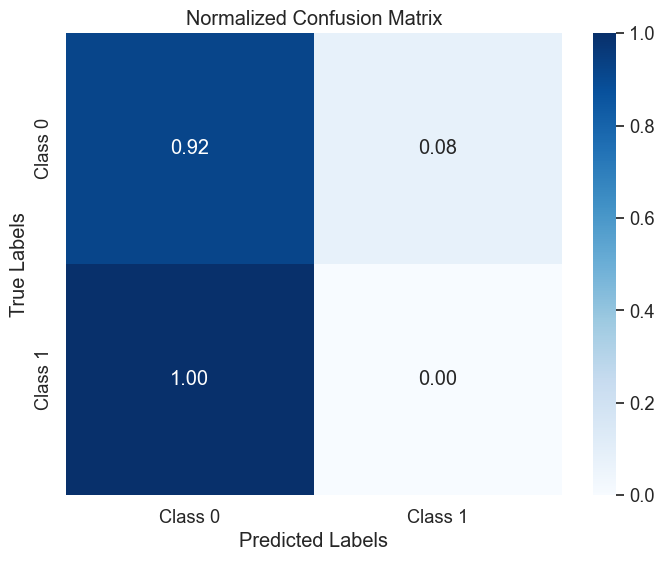

--------------------------------------------------
Generating model with parameters: {'criterion': 'gini', 'min_samples_split': 2, 'class_weight': None, 'max_features': 'log2'}
Best F1 Updated
Classes: [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0]
F1: 0.47058823529411764
[[80  6]
 [ 4  0]]


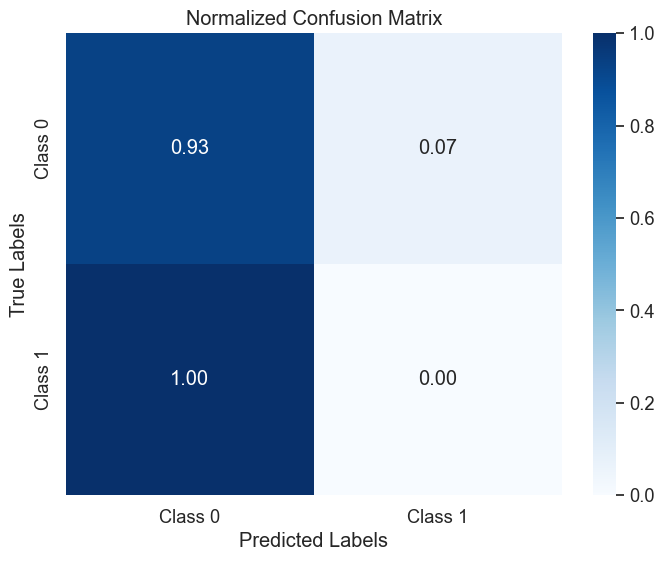

--------------------------------------------------
Generating model with parameters: {'criterion': 'gini', 'min_samples_split': 2, 'class_weight': 'balanced', 'max_features': 'sqrt'}
Best F1 Updated
Classes: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
F1: 0.4797687861271676
[[83  3]
 [ 4  0]]


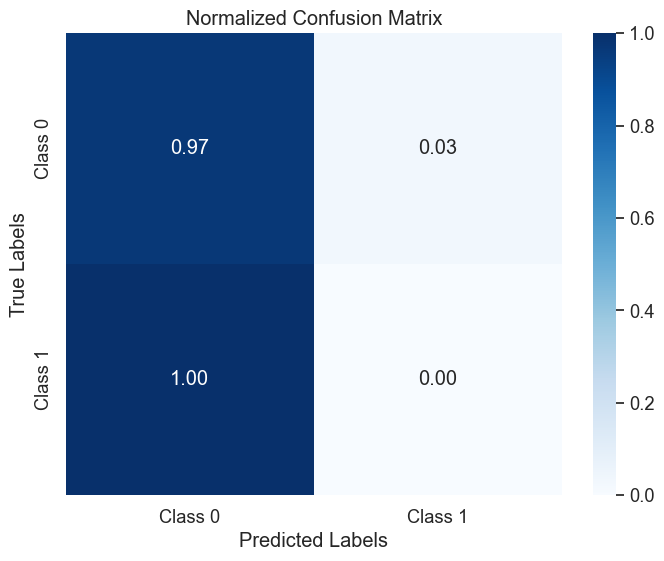

--------------------------------------------------
Generating model with parameters: {'criterion': 'gini', 'min_samples_split': 2, 'class_weight': 'balanced', 'max_features': 'log2'}
Best F1 Updated
Classes: [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
F1: 0.5906432748538011
[[82  4]
 [ 3  1]]


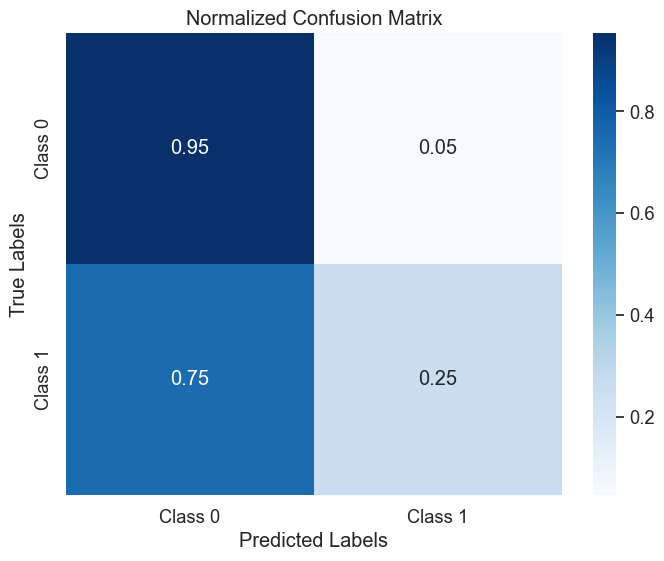

--------------------------------------------------
Generating model with parameters: {'criterion': 'gini', 'min_samples_split': 4, 'class_weight': None, 'max_features': 'sqrt'}
--------------------------------------------------
Generating model with parameters: {'criterion': 'gini', 'min_samples_split': 4, 'class_weight': None, 'max_features': 'log2'}
--------------------------------------------------
Generating model with parameters: {'criterion': 'gini', 'min_samples_split': 4, 'class_weight': 'balanced', 'max_features': 'sqrt'}
--------------------------------------------------
Generating model with parameters: {'criterion': 'gini', 'min_samples_split': 4, 'class_weight': 'balanced', 'max_features': 'log2'}
Best F1 Updated
Classes: [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
F1: 0.6284062758051197
[[84  2]
 [ 3  1]]


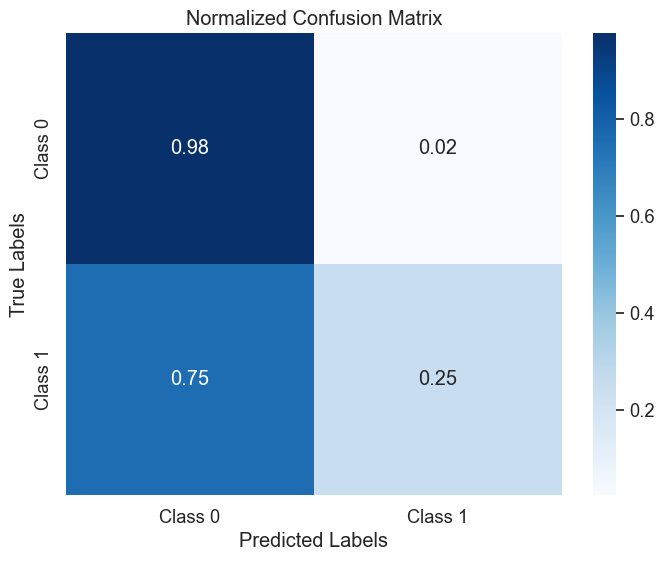

--------------------------------------------------
Generating model with parameters: {'criterion': 'gini', 'min_samples_split': 10, 'class_weight': None, 'max_features': 'sqrt'}
--------------------------------------------------
Generating model with parameters: {'criterion': 'gini', 'min_samples_split': 10, 'class_weight': None, 'max_features': 'log2'}
--------------------------------------------------
Generating model with parameters: {'criterion': 'gini', 'min_samples_split': 10, 'class_weight': 'balanced', 'max_features': 'sqrt'}
--------------------------------------------------
Generating model with parameters: {'criterion': 'gini', 'min_samples_split': 10, 'class_weight': 'balanced', 'max_features': 'log2'}
--------------------------------------------------
Generating model with parameters: {'criterion': 'gini', 'min_samples_split': 20, 'class_weight': None, 'max_features': 'sqrt'}
--------------------------------------------------
Generating model with parameters: {'criterion':

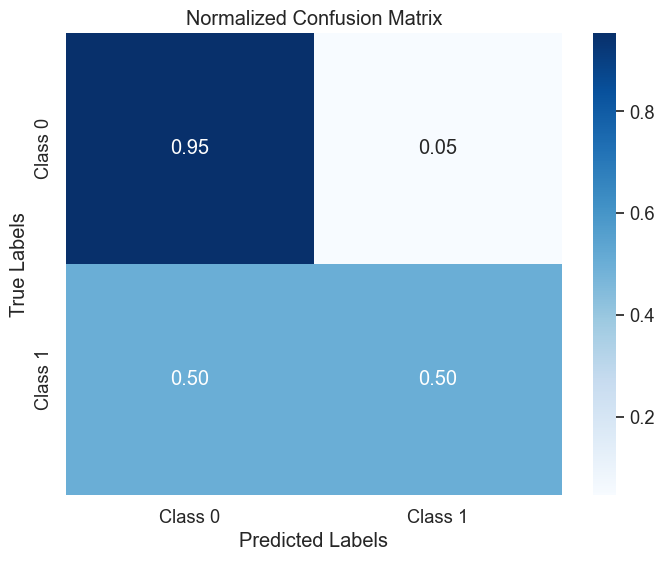

--------------------------------------------------
Generating model with parameters: {'criterion': 'entropy', 'min_samples_split': 10, 'class_weight': 'balanced', 'max_features': 'sqrt'}
--------------------------------------------------
Generating model with parameters: {'criterion': 'entropy', 'min_samples_split': 10, 'class_weight': 'balanced', 'max_features': 'log2'}
--------------------------------------------------
Generating model with parameters: {'criterion': 'entropy', 'min_samples_split': 20, 'class_weight': None, 'max_features': 'sqrt'}
--------------------------------------------------
Generating model with parameters: {'criterion': 'entropy', 'min_samples_split': 20, 'class_weight': None, 'max_features': 'log2'}
--------------------------------------------------
Generating model with parameters: {'criterion': 'entropy', 'min_samples_split': 20, 'class_weight': 'balanced', 'max_features': 'sqrt'}
--------------------------------------------------
Generating model with para

In [19]:
# Perform grid search to the best option of genetic algorithm

param_grid = {'criterion' : ['gini' , 'entropy' , 'log_loss'],
             'min_samples_split' : [2 , 4 , 10 , 20 , 50 , 100],
             'class_weight' : [None , 'balanced'],
             'max_features' : ['sqrt' , 'log2']}

num_combinations_2 = len(list(product(*param_grid.values())))
all_combinations_2 = [
    {key: value for key, value in zip(param_grid.keys(), combo)}
    for combo in product(*param_grid.values())]
print(f"Total combinations for grid search {num_combinations_2}")

# Create pipeline with the best values
threshold = POSIBLE_VALUES['threshold'][best_individual[5]]
test_clinic = POSIBLE_VALUES['test_clinic'][best_individual[4]]

# Split data
test_index = X[X['data_group_encoded'] == test_clinic].index
train_index = X[X['data_group_encoded'] != test_clinic].index

X_train = X.loc[train_index]
Y_train = Y.loc[train_index]

X_test = X.loc[test_index]
Y_test = Y.loc[test_index]

best_f1 = -1
best_model = BaggingClassifier()
best_parameters = []
for i in range(num_combinations_2):
    print('-' *50)
    print('Generating model with parameters:' , all_combinations_2[i])
      
    # Create the pipeline with the selected components
    steps = [
            ('imputer', POSIBLE_VALUES['Imputation'][best_individual[0]]),
            ('scaler', ColumnTransformer(transformers = [('scaling' ,
                                                          POSIBLE_VALUES['Numeric_Scaling'][best_individual[1]] ,
                                                          new_num_columns_index)],
                                        remainder = 'passthrough')),
            ('sampler', POSIBLE_VALUES['Sampling'][best_individual[2]]),
            ('classifier', ExtraTreeClassifier(**all_combinations_2[i]))
    ]

    pipeline = ImbPipeline(steps)


    # Train pipeline
    pipeline.fit(X_train , Y_train)
    probas = pipeline.predict_proba(X_test)
    y_pred = np.select(condlist = [probas[ : , 1] >= threshold],
                  choicelist = [1],
                  default = 0)

    # Evaluate with F1 Score
    scores = f1_score(Y_test , y_pred , average = 'macro')
    # Verify if it is the best model
    if scores > best_f1:
        print('Best F1 Updated')
        best_f1 = scores
        best_model = pipeline
        best_parameters = all_combinations_2[i]
        #print('Probabilities' , probas)
        print('Classes:' , y_pred)
        print('F1:' , scores)

        # Show confusion matrix
        cm = confusion_matrix(Y_test.values , y_pred)
        print(cm)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # Plotting the confusion matrix
        plt.figure(figsize=(8, 6))
        sns.set(font_scale=1.2)
        ax = sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', cbar=True,
                           xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

        ax.set_xlabel('Predicted Labels')
        ax.set_ylabel('True Labels')
        ax.set_title('Normalized Confusion Matrix')
        plt.show()

In [20]:
# Test the best trained model on all test sets, with and without re 
with open(r'..\models\26_2_Best_Model_with_Configuration.pkl' , 'wb') as file:
    joblib.dump(best_model , file)
print('File Exported -->' , str(best_model) , 'in ../models/Best_Model_with_Configuration.pkl')
best_parameters

File Exported --> Pipeline(steps=[('imputer', KNNImputer()),
                ('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling', MinMaxScaler(),
                                                  [1, 2, 4])])),
                ('sampler', RandomOverSampler()),
                ('classifier',
                 ExtraTreeClassifier(criterion='entropy', max_features='log2',
                                     min_samples_split=10))]) in ../models/Best_Model_with_Configuration.pkl


{'criterion': 'entropy',
 'min_samples_split': 10,
 'class_weight': None,
 'max_features': 'log2'}

Test with each clinic:
This is not exactly okay due the other clinics were used into train set

--------------------------------------------------
Test clinic: emmental_hospital , F1: 0.5885964912280701
[[50 12]
 [ 2  3]]


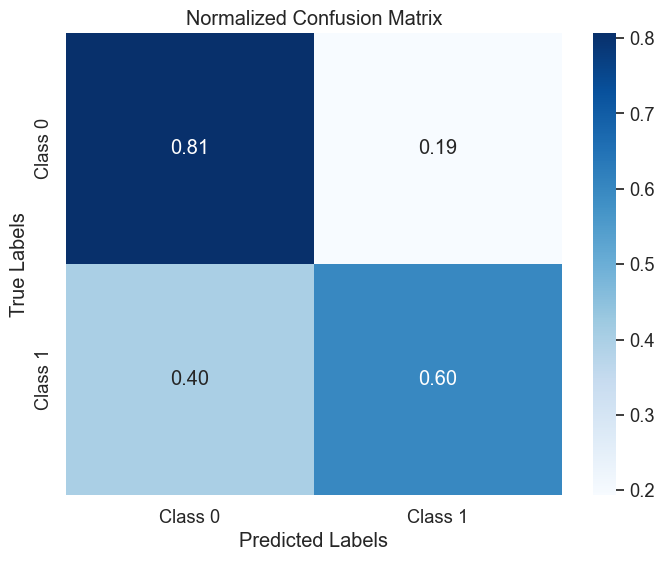

--------------------------------------------------
Test clinic: gzo_wetzikon , F1: 0.5518510500108249
[[63 23]
 [ 0  4]]


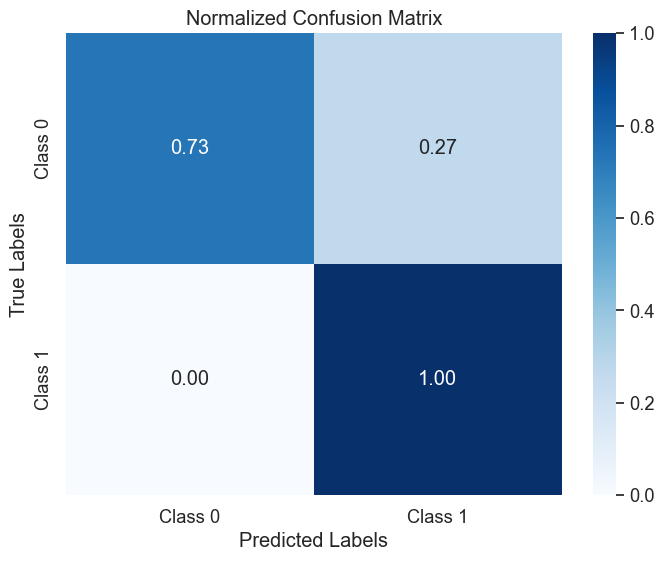

--------------------------------------------------
Test clinic: military_universit , F1: 0.5233021402761049
[[216  68]
 [  2   8]]


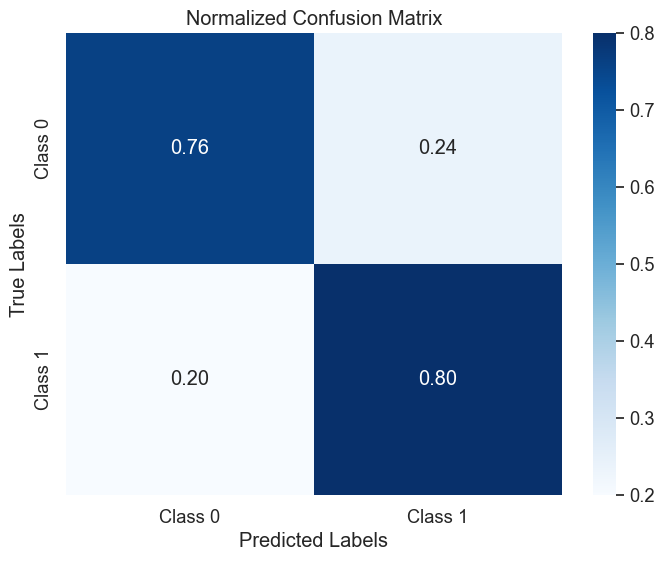

--------------------------------------------------
Test clinic: uk , F1: 0.47116500258475724
[[1509 1287]
 [  30  215]]


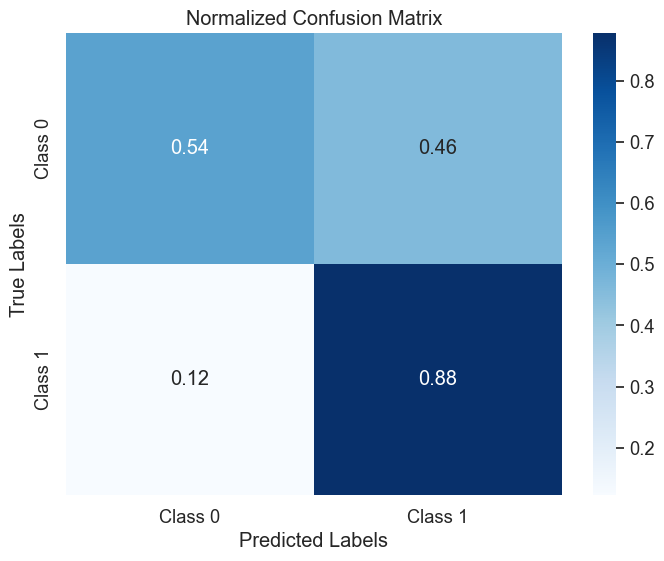

--------------------------------------------------
Test clinic: universitt_innsbru , F1: 0.6376991516656321
[[81 17]
 [ 0  5]]


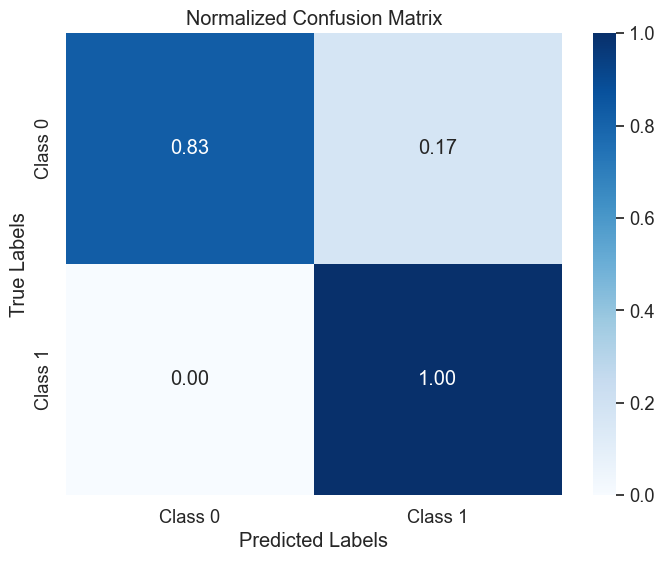

--------------------------------------------------
Test clinic: university_basel , F1: 0.5334906057797624
[[94 95]
 [ 3 34]]


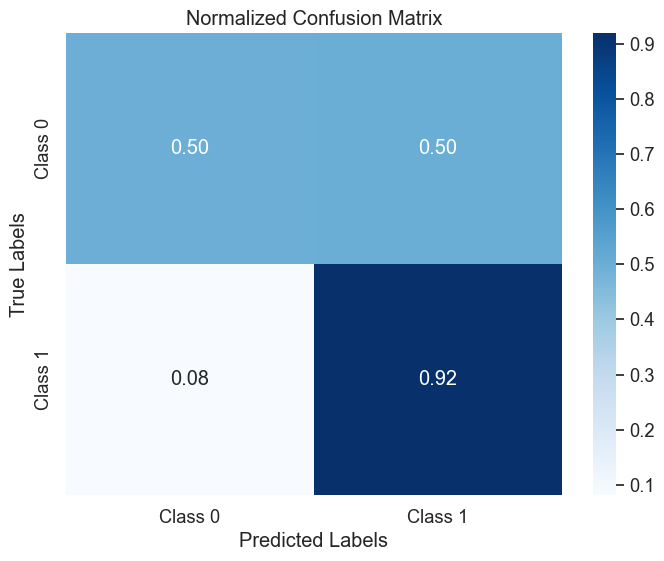

--------------------------------------------------
Test clinic: university_dalhous , F1: 0.5008807985907222
[[202 118]
 [  2  18]]


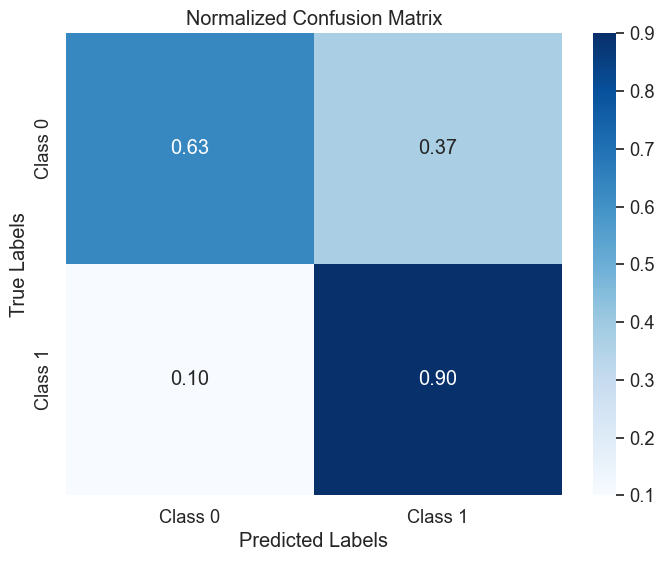

--------------------------------------------------
Test clinic: university_hamburg , F1: 0.5422559906487434
[[103  87]
 [  2  28]]


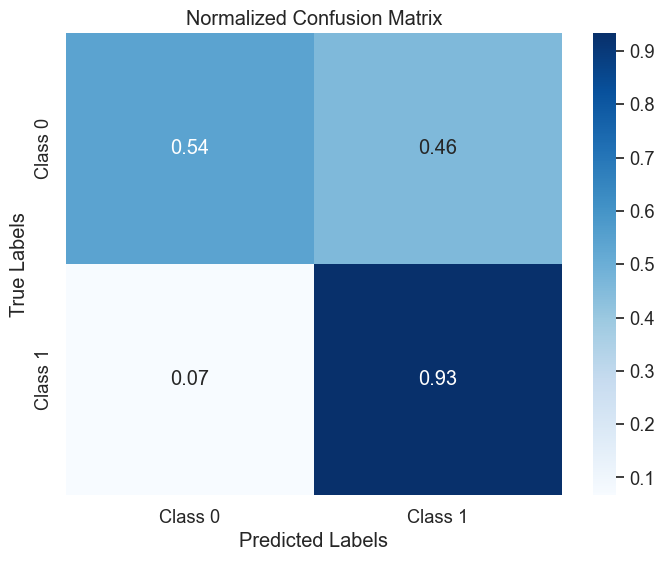

--------------------------------------------------
Test clinic: university_las_veg , F1: 0.44039974894993483
[[101  65]
 [  2   5]]


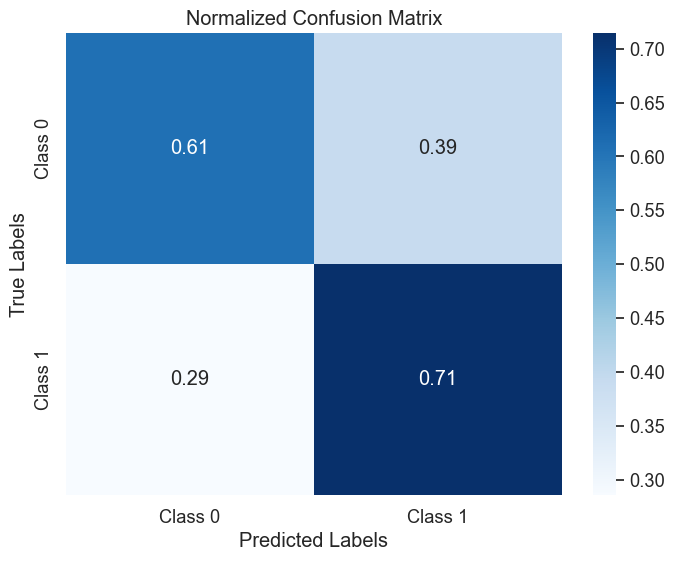

--------------------------------------------------
Test clinic: university_of_east , F1: 0.40530303030303033
[[176 130]
 [  2   6]]


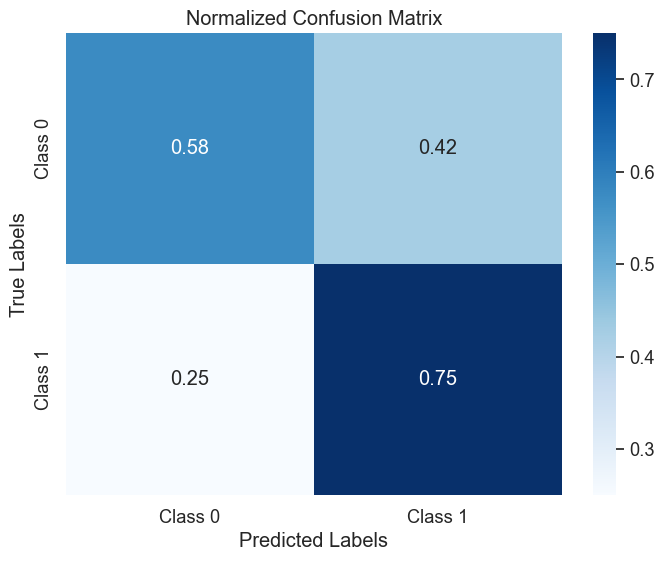

--------------------------------------------------
Test clinic: university_vilnius , F1: 0.4515625
[[119 101]
 [  1  13]]


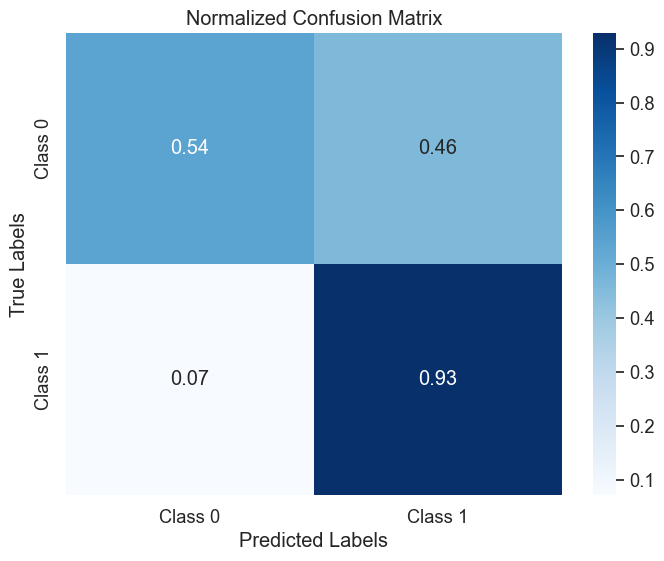

--------------------------------------------------
Test clinic: university_wrzburg , F1: 0.4965735766984466
[[356 241]
 [  8  42]]


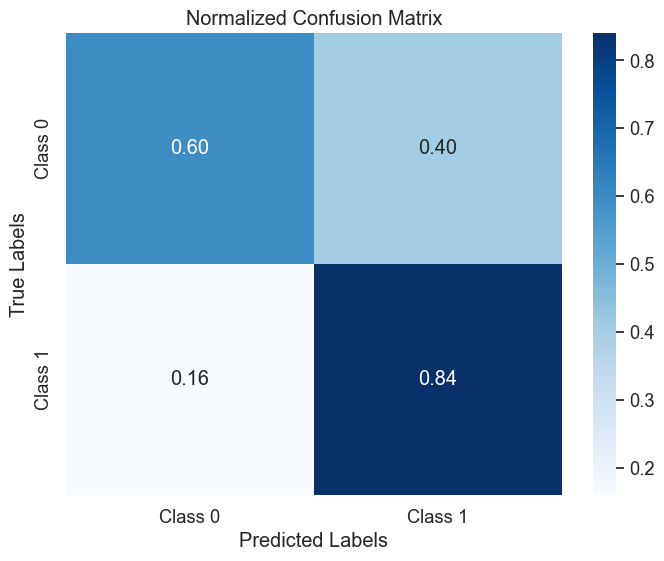

In [21]:
# Test model to each clinic
for i in allowed_test_sets:
    print('-' * 50)
    probas = pipeline.predict_proba(df[df['data_group_encoded'] == i].drop(columns = TARGET))
    y_pred = np.select(condlist = [probas[ : , 1] >= threshold],
                  choicelist = [1],
                  default = 0)

    # Evaluate with F1 Score
    scores = f1_score(df[df['data_group_encoded'] == i][TARGET] , y_pred , average = 'macro')
    
    print(f"Test clinic: {clinics_2[i]} , F1: {scores}")
    
    # Show confusion matrix
    cm = confusion_matrix(df[df['data_group_encoded'] == i][TARGET].values , y_pred)
    print(cm)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    ax = sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', cbar=True,
                       xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_title('Normalized Confusion Matrix')
    plt.show()

This is a better approach but with worse results

--------------------------------------------------
Test clinic: emmental_hospital , F1: 0.47244094488188976
[[60  2]
 [ 5  0]]


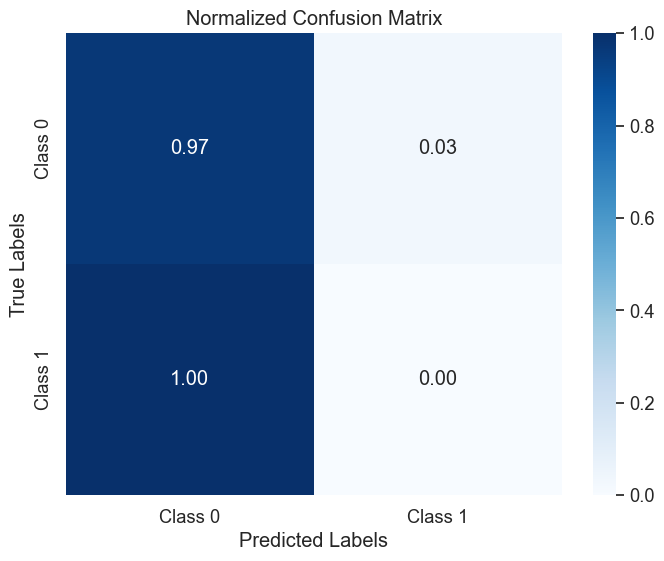

--------------------------------------------------
Test clinic: gzo_wetzikon , F1: 0.46745562130177515
[[79  7]
 [ 4  0]]


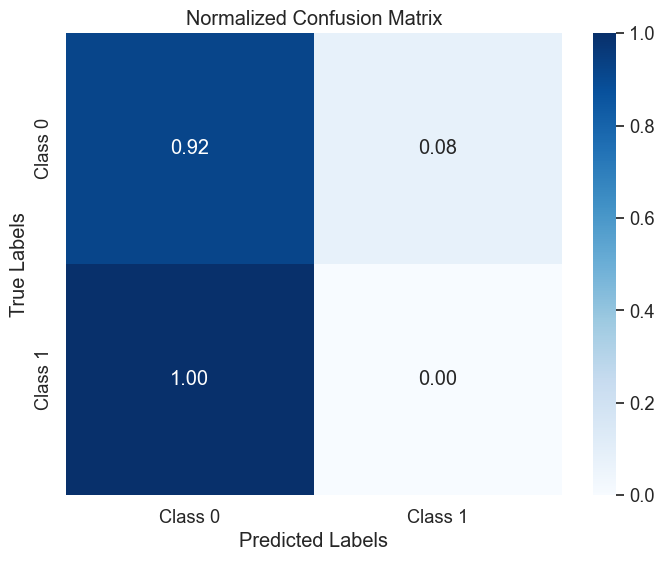

--------------------------------------------------
Test clinic: military_universit , F1: 0.5103324902843748
[[266  18]
 [  9   1]]


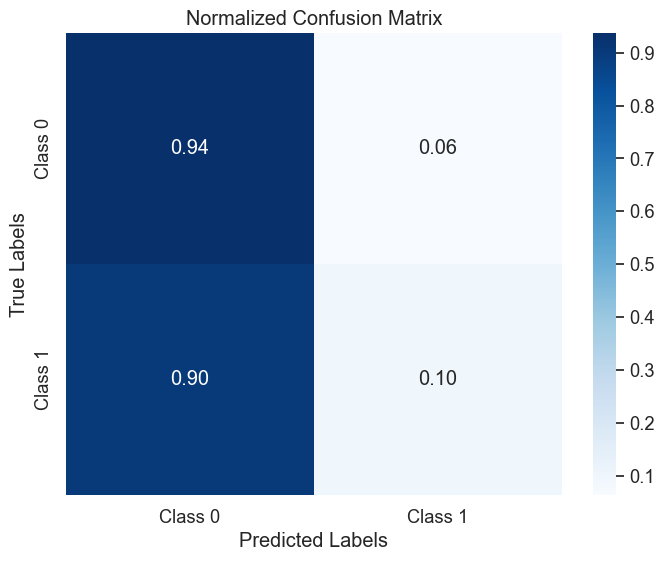

--------------------------------------------------
Test clinic: uk , F1: 0.505949249574501
[[2508  288]
 [ 216   29]]


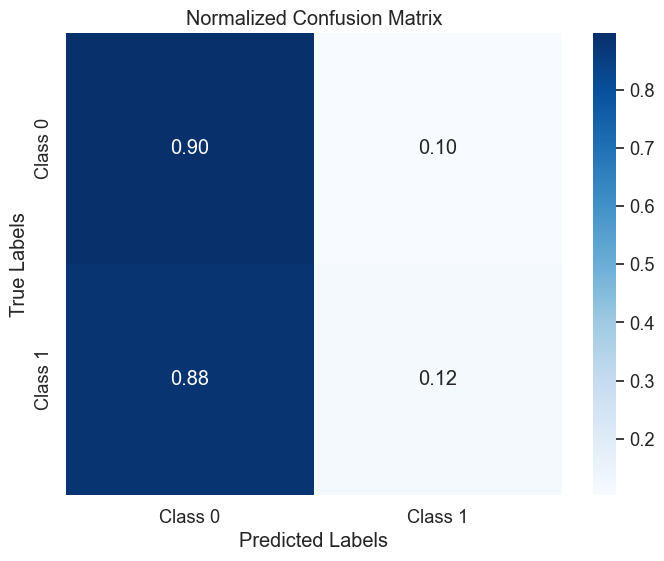

--------------------------------------------------
Test clinic: universitt_innsbru , F1: 0.4824120603015075
[[96  2]
 [ 5  0]]


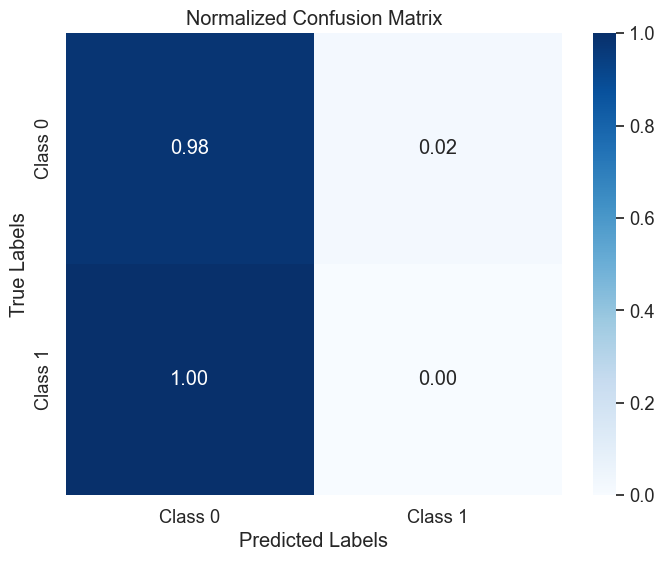

--------------------------------------------------
Test clinic: university_basel , F1: 0.48573429021529846
[[171  18]
 [ 34   3]]


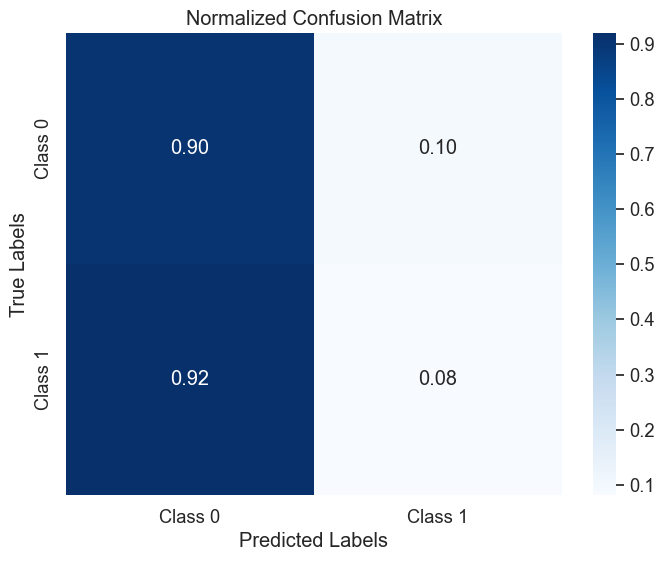

--------------------------------------------------
Test clinic: university_dalhous , F1: 0.46540880503144655
[[296  24]
 [ 20   0]]


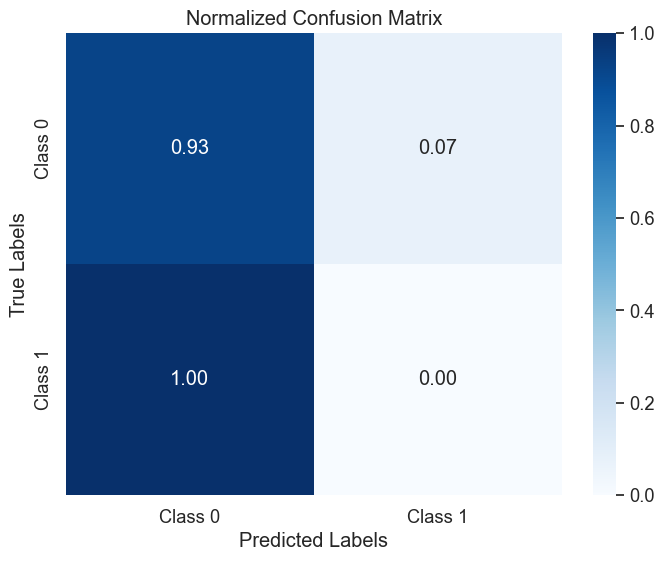

--------------------------------------------------
Test clinic: university_hamburg , F1: 0.5172995780590718
[[178  12]
 [ 27   3]]


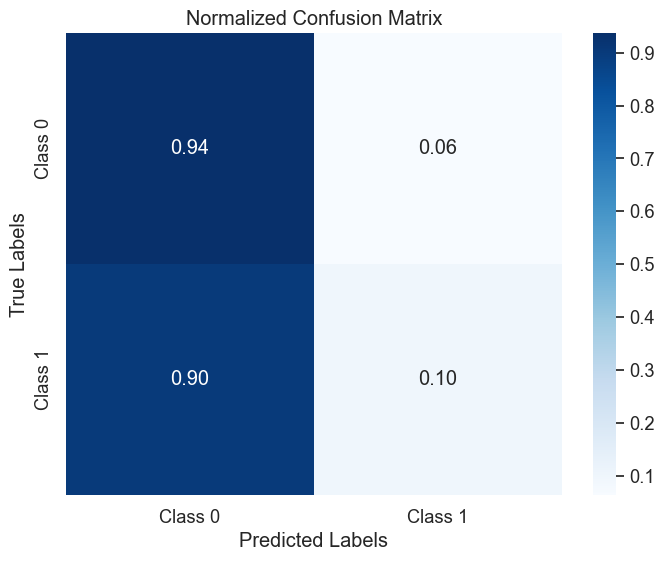

--------------------------------------------------
Test clinic: university_las_veg , F1: 0.4820359281437126
[[161   5]
 [  7   0]]


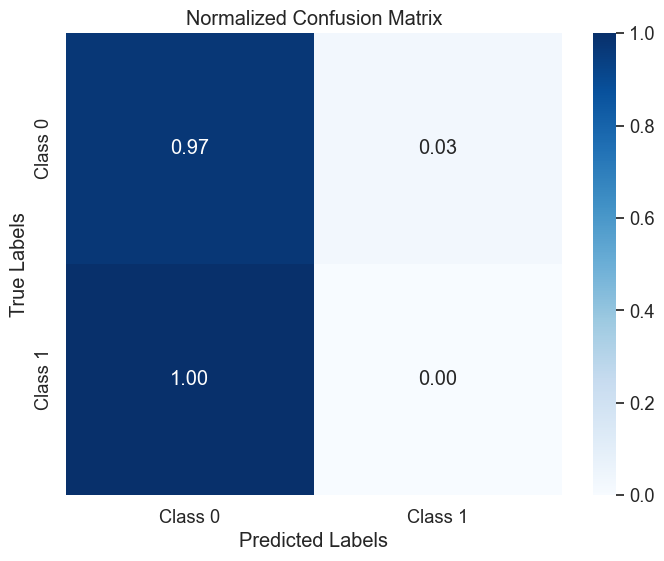

--------------------------------------------------
Test clinic: university_of_east , F1: 0.49906156156156156
[[279  27]
 [  7   1]]


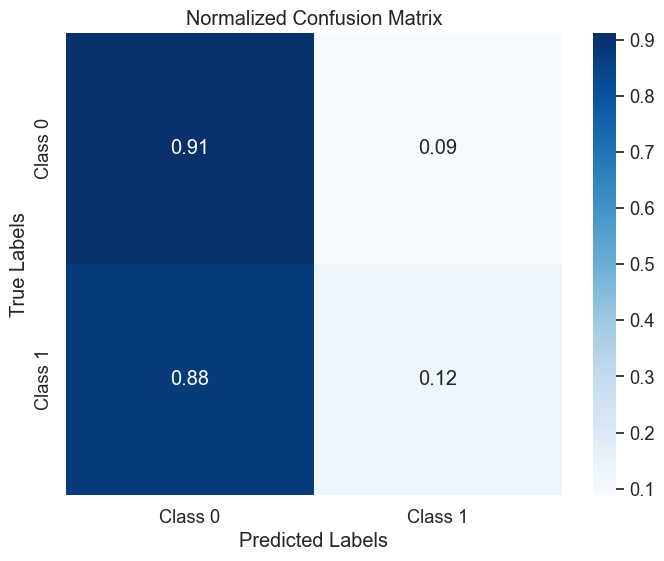

--------------------------------------------------
Test clinic: university_vilnius , F1: 0.47058823529411764
[[208  12]
 [ 14   0]]


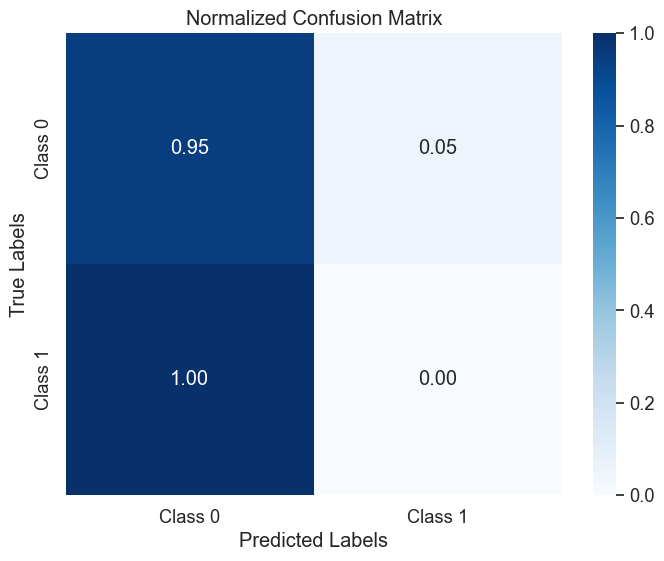

--------------------------------------------------
Test clinic: university_wrzburg , F1: 0.5364344259068254
[[548  49]
 [ 42   8]]


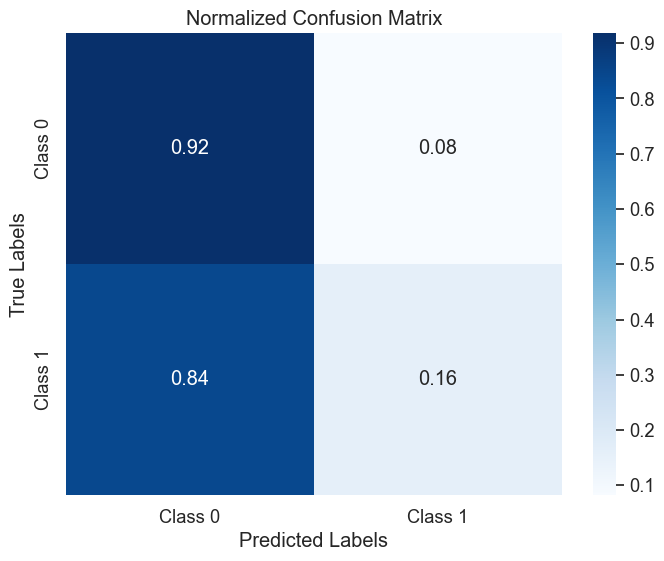

In [22]:
# Test model to each clinic
for i in allowed_test_sets:
    print('-' * 50)
    steps = [
            ('imputer', POSIBLE_VALUES['Imputation'][best_individual[0]]),
            ('scaler', ColumnTransformer(transformers = [('scaling' ,
                                                          POSIBLE_VALUES['Numeric_Scaling'][best_individual[1]] ,
                                                          new_num_columns_index)],
                                        remainder = 'passthrough')),
            ('sampler', POSIBLE_VALUES['Sampling'][best_individual[2]]),
            ('classifier', ExtraTreeClassifier(**best_parameters))
    ]

    aux_pipeline = ImbPipeline(steps)

    # Train pipeline
    aux_pipeline.fit(df[df['data_group_encoded'] != i].drop(columns = TARGET) ,
                     df[df['data_group_encoded'] != i][TARGET])
    # Predictions
    probas = aux_pipeline.predict_proba(df[df['data_group_encoded'] == i].drop(columns = TARGET))
    y_pred = np.select(condlist = [probas[ : , 1] >= threshold],
                  choicelist = [1],
                  default = 0)

    # Evaluate with F1 Score
    scores = f1_score(df[df['data_group_encoded'] == i][TARGET] , y_pred , average = 'macro')
    
    print(f"Test clinic: {clinics_2[i]} , F1: {scores}")
    
    # Show confusion matrix
    cm = confusion_matrix(df[df['data_group_encoded'] == i][TARGET].values , y_pred)
    print(cm)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    ax = sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', cbar=True,
                       xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_title('Normalized Confusion Matrix')
    plt.show()

## **2.2 Training With CV**

In [24]:
# Define X and Y
X = df.drop(columns = TARGET).reset_index(drop = True)
Y = df[TARGET].reset_index(drop = True)

# Perform imputation
X2 = pd.DataFrame(POSIBLE_VALUES['Imputation'][best_individual[0]].fit_transform(X) , columns = X.columns)

# Perform Scaling
X2[new_num_columns] = POSIBLE_VALUES['Numeric_Scaling'][best_individual[1]].fit_transform(X2[new_num_columns])

# Perform oversampling
X2 , Y2 = POSIBLE_VALUES['Sampling'][best_individual[2]].fit_resample(X2 , Y)

# Create a object for cross validation
skf = StratifiedKFold(10)

# Train model with cross validation
results = {}
for i, (train_index, test_index) in enumerate(skf.split(X2, Y2)):
    X_train = X2.loc[train_index]
    X_test = X2.loc[test_index]
    Y_train = Y2.loc[train_index]
    Y_test = Y2.loc[test_index]
    
    model = ExtraTreeClassifier(**best_parameters).fit(X_train , Y_train)
    
    probas = model.predict_proba(X_test)
    y_pred = np.select(condlist = [probas[ : , 1] >= threshold],
                  choicelist = [1],
                  default = 0)

    # Evaluate with F1 Score
    scores = f1_score(Y_test , y_pred , average = 'macro')
    
    results[i] = scores
    print('-' * 50)
    print(f"Fold: {i} , F1 Macro: {scores}")

print('-' * 50)
print(f"Mean F1 Macro: {np.mean(list(results.values()))}")
# Confident interval
print('Confident Interval 95%')
print(stats.t.interval(0.95, df=len(list(results.values()))-1, 
              loc=np.mean(list(results.values())), 
              scale=stats.sem(list(results.values()))))

--------------------------------------------------
Fold: 0 , F1 Macro: 0.7796121955996604
--------------------------------------------------
Fold: 1 , F1 Macro: 0.9330973578607343
--------------------------------------------------
Fold: 2 , F1 Macro: 0.945045937246977
--------------------------------------------------
Fold: 3 , F1 Macro: 0.9533273437663233
--------------------------------------------------
Fold: 4 , F1 Macro: 0.943202733363228
--------------------------------------------------
Fold: 5 , F1 Macro: 0.9395128891864748
--------------------------------------------------
Fold: 6 , F1 Macro: 0.94322515253693
--------------------------------------------------
Fold: 7 , F1 Macro: 0.9209622512287488
--------------------------------------------------
Fold: 8 , F1 Macro: 0.848702211426271
--------------------------------------------------
Fold: 9 , F1 Macro: 0.747010582010582
--------------------------------------------------
Mean F1 Macro: 0.895369865422593
Confident Interval 95%

## **2.3 Holdout Test Set by changing train set size**

--------------------------------------------------
Training with test size of 0.1
--------------------------------------------------
Training with test size of 0.15
--------------------------------------------------
Training with test size of 0.2
--------------------------------------------------
Training with test size of 0.25
--------------------------------------------------
Training with test size of 0.3
--------------------------------------------------
Training with test size of 0.35
--------------------------------------------------
Training with test size of 0.4
--------------------------------------------------
Training with test size of 0.45
--------------------------------------------------
Training with test size of 0.5


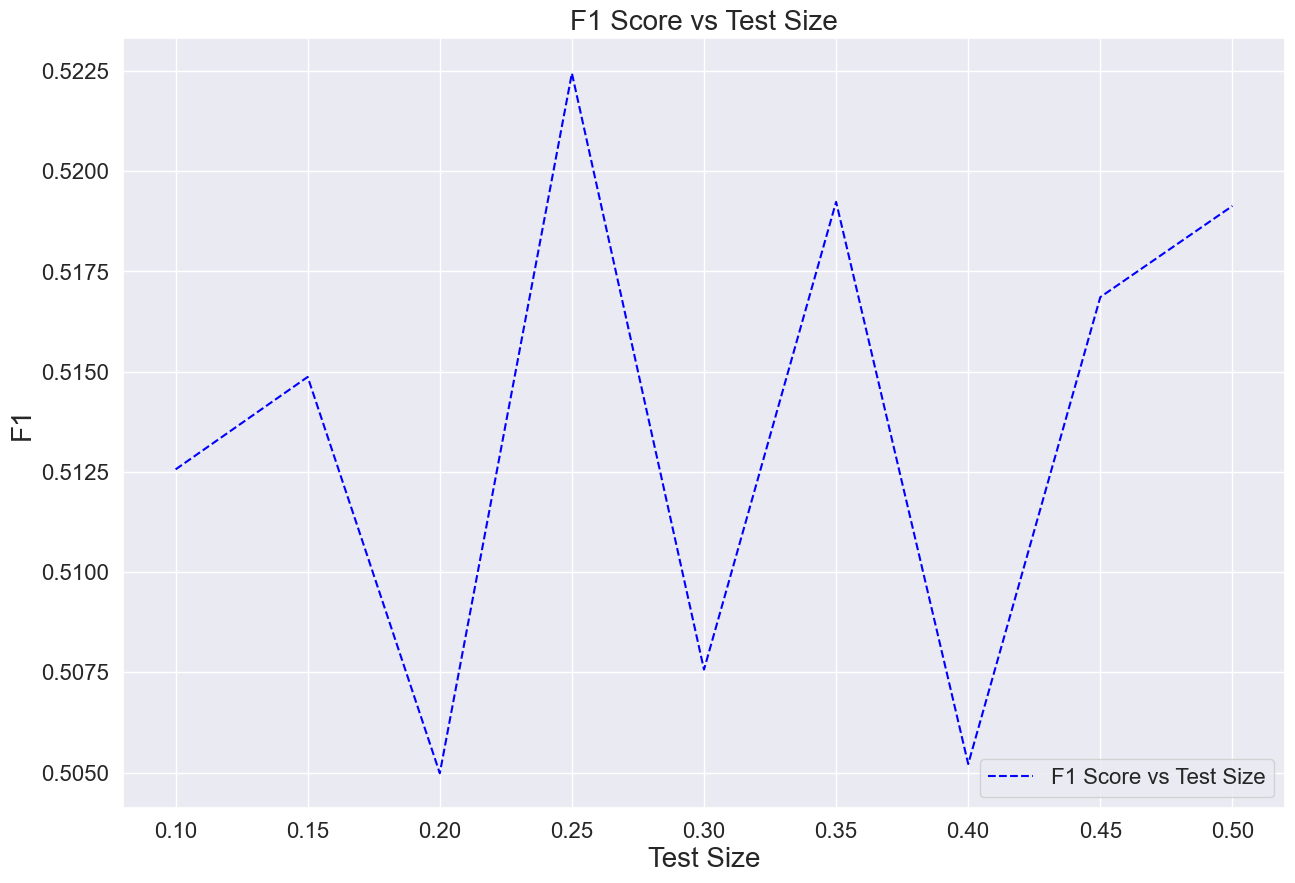

In [26]:
# Create train sizes
train_sizes = (np.array(list(range(10 , 51 , 5))) / 100).tolist()
results_train_sizes = {}
for i in train_sizes:
    print('-' * 50)
    print('Training with test size of' , i)
    # Select X and Y ranodmly
    threshold = 0.425
    # Select the best values of each step and seed using Genetic Algorithms
    X = df.drop(columns = TARGET).reset_index(drop = True)
    Y = df[TARGET].reset_index(drop = True)

    # Split data
    X_train , X_test , Y_train , Y_test = train_test_split(X,
                                                           Y,
                                                           test_size = i,
                                                           stratify = Y)
    
    # Create and fit model
    steps = [
        ('imputer', KNNImputer()),
        ('scaler', ColumnTransformer(transformers = [('scaling',
                                                     MinMaxScaler() ,
                                                      new_num_columns_index)],
                                    remainder = 'passthrough')),
        ('sampler', RandomOverSampler()),
        ('classifier', ExtraTreeClassifier(**best_parameters))
    ]
    
    pipeline = ImbPipeline(steps)
    pipeline.fit(X_train , Y_train)

    probas = pipeline.predict_proba(X_test)
    y_pred = np.select(condlist = [probas[ : , 1] >= threshold],
                  choicelist = [1],
                  default = 0)


    # Evaluate with F1 Score
    f1 = f1_score(Y_test , y_pred , average = 'macro')
    precision = precision_score(Y_test ,  y_pred , average = 'macro')
    recall = recall_score(Y_test ,  y_pred , average = 'macro')
    accuracy = accuracy_score(Y_test ,  y_pred)
    roc_auc = roc_auc_score(Y_test ,  y_pred)
    
    results_train_sizes[i] = {'f1' : f1,
                             'precision' : precision,
                             'recall' : recall,
                             'accuracy' : accuracy,
                             'roc_auc' : roc_auc,
                             'train_size' : i}
    

# Plot results across train size
f1_train_sizes = [results_train_sizes[i]['f1'] for i in results_train_sizes.keys()]
# ROC Curve
plt.rcParams["figure.figsize"] = (15,10)
plt.plot(results_train_sizes.keys(), f1_train_sizes, linestyle = '--' ,  label = 'F1 Score vs Test Size' , color = 'blue')
# axis labels
plt.xlabel('Test Size', fontsize=20)
plt.ylabel('F1', fontsize=20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
# show the legend
plt.legend(loc='lower right' , fontsize = 16)
# Title
plt.title('F1 Score vs Test Size' , fontsize = 20)
# Export ROC Plot
plt.savefig(r'..\results\f1_score_test_size_with_configuration.png')
# show the plot
plt.show()

# **3. Comparison with other models**

In [27]:
# Util functions for plots
# Function to smooth the ROC curve using a moving average
def smooth_roc_curve(fpr, tpr, window_size=5):
    df = pd.DataFrame({'fpr': fpr, 'tpr': tpr})
    df_smoothed = df.rolling(window=window_size).mean().dropna()
    # Add (1,1) point at the end
    df_smoothed = pd.concat([df_smoothed,
                             pd.DataFrame({'fpr' : [1] , 'tpr' : [1]})] , axis = 0)
    return df_smoothed['fpr'].values, df_smoothed['tpr'].values


# Function to smooth the Precision Recall curve using a moving average
def smooth_precision_curve(precision, recall, window_size=5):
    df = pd.DataFrame({'precision': precision, 'recall': recall})
    df_smoothed = df.rolling(window=window_size).mean().dropna()
    # Add (1,0) point at the end
    df_smoothed = pd.concat([df_smoothed,
                             pd.DataFrame({'precision' : [1] , 'recall' : [0]})] , axis = 0)
    return df_smoothed['precision'].values, df_smoothed['recall'].values

## **3.1 Holdout Test Set**

In [28]:
# Load best model
with open(r'..\models\26_2_Best_Model_with_Configuration.pkl' , 'rb') as file:
    best_model = joblib.load(file)
best_model

Pipeline(steps=[('imputer', KNNImputer()),
                ('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling', MinMaxScaler(),
                                                  [1, 2, 4])])),
                ('sampler', RandomOverSampler()),
                ('classifier',
                 ExtraTreeClassifier(criterion='entropy', max_features='log2',
                                     min_samples_split=10))])

In [33]:
results_plots = {}
# Make X and Y for holdout with the best selection for the genecit algorithm
test_set_number = 2
threshold = 0.425
# Select the best values of each step and seed using Genetic Algorithms
X = df.drop(columns = TARGET).reset_index(drop = True)
Y = df[TARGET].reset_index(drop = True)

# Split data
test_index = X[X['data_group_encoded'] == test_set_number].index
train_index = X[X['data_group_encoded'] != test_set_number].index

X_train = X.loc[train_index]
Y_train = Y.loc[train_index]

X_test = X.loc[test_index]
Y_test = Y.loc[test_index]

probas = best_model.predict_proba(X_test)
y_pred = np.select(condlist = [probas[ : , 1] >= threshold],
              choicelist = [1],
              default = 0)

# Evaluate metrics
print('Metrics for best model:')
print(f"F1 Score: {f1_score(Y_test ,  y_pred , average = 'macro')}")
print(f"Recall Score: {recall_score(Y_test ,  y_pred , average = 'macro')}")
print(f"Precision Score: {precision_score(Y_test ,  y_pred , average = 'macro')}")
print(f"Accuracy Score: {accuracy_score(Y_test ,  y_pred)}")
print(f"ROC AUC Score: {roc_auc_score(Y_test ,  y_pred , average = 'macro')}")

# Save information
results_plots['ExtraTree'] = {'probas' : probas,
                           'y_pred' : y_pred,
                           'ROC' : roc_auc_score(Y_test ,  y_pred , average = 'macro')}

Metrics for best model:
F1 Score: 0.6823529411764706
Recall Score: 0.7267441860465116
Precision Score: 0.6547619047619048
Accuracy Score: 0.9333333333333333
ROC AUC Score: 0.7267441860465117


In [34]:
# Train other models for model comparison
models_to_test = [LogisticRegression(),
                  AdaBoostClassifier(),
                  XGBClassifier(),
                  RandomForestClassifier(),
                  CatBoostClassifier(logging_level = 'Silent'),
                  LGBMClassifier(verbosity=-1),
                  SVC(max_iter = 10000 , probability = True),
                  MLPClassifier(hidden_layer_sizes = (512 , 10))]

model_to_test_names = ['Lasso',
                      'Adaptative Boosting',
                      'Extreme Gradient Boosting',
                      'Random Forest',
                      'CatBoost',
                      'Light GBM',
                      'Support Vector Machines',
                      'Neural Network']

for i in models_to_test:
    print('-' * 50)
    print('Training with model' , i)
    # Create model pipeline
    steps = [
            ('imputer', KNNImputer()),
            ('scaler', ColumnTransformer(transformers = [('scaling' ,
                                                          MinMaxScaler() ,
                                                          new_num_columns_index)],
                                        remainder = 'passthrough')),
            ('sampler', RandomOverSampler()),
            ('classifier', i)
    ]

    aux_pipeline = ImbPipeline(steps)
    aux_pipeline.fit(X_train , Y_train)
    
    probas = aux_pipeline.predict_proba(X_test)
    y_pred = np.select(condlist = [probas[ : , 1] >= threshold],
                  choicelist = [1],
                  default = 0)

    # Evaluate metrics
    print('Metrics')
    print(f"F1 Score: {f1_score(Y_test ,  y_pred , average = 'macro')}")
    print(f"Recall Score: {recall_score(Y_test ,  y_pred , average = 'macro')}")
    print(f"Precision Score: {precision_score(Y_test ,  y_pred , average = 'macro')}")
    print(f"Accuracy Score: {accuracy_score(Y_test ,  y_pred)}")
    print(f"ROC AUC Score: {roc_auc_score(Y_test ,  y_pred , average = 'macro')}")
    
    # Save information
    results_plots[model_to_test_names[models_to_test.index(i)]] = {'probas' : probas,
                               'y_pred' : y_pred,
                               'ROC' : roc_auc_score(Y_test ,  y_pred , average = 'macro')}

--------------------------------------------------
Training with model LogisticRegression()
Metrics
F1 Score: 0.4156869626250219
Recall Score: 0.5465116279069768
Precision Score: 0.5081591024987251
Accuracy Score: 0.5888888888888889
ROC AUC Score: 0.5465116279069767
--------------------------------------------------
Training with model AdaBoostClassifier()
Metrics
F1 Score: 0.054505005561735265
Recall Score: 0.5058139534883721
Precision Score: 0.5224719101123596
Accuracy Score: 0.05555555555555555
ROC AUC Score: 0.5058139534883721
--------------------------------------------------
Training with model XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, lear

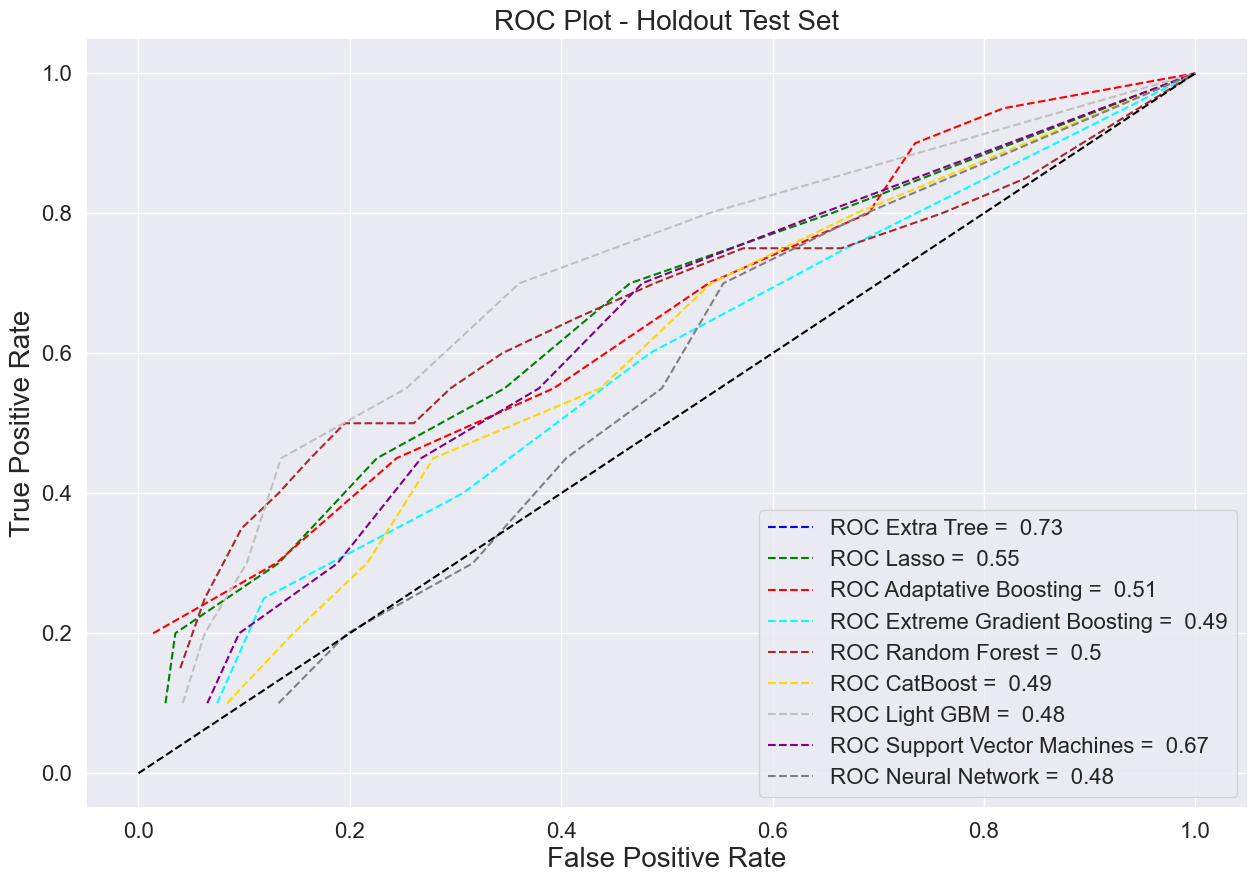

In [37]:
# ROC AUC Plot
fpr = {}
tpr = {}
smooth_fpr = {}
smooth_tpr = {}
interp_smooth_tpr = {}

fpr[model_to_test_names[0]] , tpr[model_to_test_names[0]] , _ = roc_curve(Y_test, results_plots[model_to_test_names[0]]['probas'][: , 1])
smooth_fpr[model_to_test_names[0]], smooth_tpr[model_to_test_names[0]] = smooth_roc_curve(fpr[model_to_test_names[0]], tpr[model_to_test_names[0]], window_size=5)
interp_smooth_tpr[model_to_test_names[0]] = interp1d(smooth_fpr[model_to_test_names[0]], smooth_tpr[model_to_test_names[0]] , kind='linear', fill_value='extrapolate')

fpr[model_to_test_names[1]] , tpr[model_to_test_names[1]] , _ = roc_curve(Y_test, results_plots[model_to_test_names[1]]['probas'][: , 1])
smooth_fpr[model_to_test_names[1]], smooth_tpr[model_to_test_names[1]] = smooth_roc_curve(fpr[model_to_test_names[1]], tpr[model_to_test_names[1]], window_size=5)
interp_smooth_tpr[model_to_test_names[1]] = interp1d(smooth_fpr[model_to_test_names[1]], smooth_tpr[model_to_test_names[1]] , kind='linear', fill_value='extrapolate')

fpr[model_to_test_names[2]] , tpr[model_to_test_names[2]] , _ = roc_curve(Y_test, results_plots[model_to_test_names[2]]['probas'][: , 1])
smooth_fpr[model_to_test_names[2]], smooth_tpr[model_to_test_names[2]] = smooth_roc_curve(fpr[model_to_test_names[2]], tpr[model_to_test_names[2]], window_size=5)
interp_smooth_tpr[model_to_test_names[2]] = interp1d(smooth_fpr[model_to_test_names[2]], smooth_tpr[model_to_test_names[2]] , kind='linear', fill_value='extrapolate')

fpr[model_to_test_names[3]] , tpr[model_to_test_names[3]] , _ = roc_curve(Y_test, results_plots[model_to_test_names[3]]['probas'][: , 1])
smooth_fpr[model_to_test_names[3]], smooth_tpr[model_to_test_names[3]] = smooth_roc_curve(fpr[model_to_test_names[3]], tpr[model_to_test_names[3]], window_size=5)
interp_smooth_tpr[model_to_test_names[3]] = interp1d(smooth_fpr[model_to_test_names[3]], smooth_tpr[model_to_test_names[3]] , kind='linear', fill_value='extrapolate')

fpr[model_to_test_names[4]] , tpr[model_to_test_names[4]] , _ = roc_curve(Y_test, results_plots[model_to_test_names[4]]['probas'][: , 1])
smooth_fpr[model_to_test_names[4]], smooth_tpr[model_to_test_names[4]] = smooth_roc_curve(fpr[model_to_test_names[4]], tpr[model_to_test_names[4]], window_size=5)
interp_smooth_tpr[model_to_test_names[4]] = interp1d(smooth_fpr[model_to_test_names[4]], smooth_tpr[model_to_test_names[4]] , kind='linear', fill_value='extrapolate')

fpr[model_to_test_names[5]] , tpr[model_to_test_names[5]] , _ = roc_curve(Y_test, results_plots[model_to_test_names[5]]['probas'][: , 1])
smooth_fpr[model_to_test_names[5]], smooth_tpr[model_to_test_names[5]] = smooth_roc_curve(fpr[model_to_test_names[5]], tpr[model_to_test_names[5]], window_size=5)
interp_smooth_tpr[model_to_test_names[5]] = interp1d(smooth_fpr[model_to_test_names[5]], smooth_tpr[model_to_test_names[5]] , kind='linear', fill_value='extrapolate')

fpr[model_to_test_names[6]] , tpr[model_to_test_names[6]] , _ = roc_curve(Y_test, results_plots[model_to_test_names[6]]['probas'][: , 1])
smooth_fpr[model_to_test_names[6]], smooth_tpr[model_to_test_names[6]] = smooth_roc_curve(fpr[model_to_test_names[6]], tpr[model_to_test_names[6]], window_size=5)
interp_smooth_tpr[model_to_test_names[6]] = interp1d(smooth_fpr[model_to_test_names[6]], smooth_tpr[model_to_test_names[6]] , kind='linear', fill_value='extrapolate')

fpr[model_to_test_names[7]] , tpr[model_to_test_names[7]] , _ = roc_curve(Y_test, results_plots[model_to_test_names[7]]['probas'][: , 1])
smooth_fpr[model_to_test_names[7]], smooth_tpr[model_to_test_names[7]] = smooth_roc_curve(fpr[model_to_test_names[7]], tpr[model_to_test_names[7]], window_size=5)
interp_smooth_tpr[model_to_test_names[7]] = interp1d(smooth_fpr[model_to_test_names[7]], smooth_tpr[model_to_test_names[7]] , kind='linear', fill_value='extrapolate')

fpr['ExtraTree'] , tpr['ExtraTree'] , _ = roc_curve(Y_test, results_plots['ExtraTree']['probas'][: , 1])
smooth_fpr['ExtraTree'], smooth_tpr['ExtraTree'] = smooth_roc_curve(fpr['ExtraTree'], tpr['ExtraTree'], window_size=5)
interp_smooth_tpr['ExtraTree'] = interp1d(smooth_fpr['ExtraTree'], smooth_tpr['ExtraTree'] , kind='linear', fill_value='extrapolate')


# ROC Curve
plt.rcParams["figure.figsize"] = (15,10)
plt.plot(smooth_fpr['ExtraTree'], interp_smooth_tpr['ExtraTree'](smooth_fpr['ExtraTree']), linestyle = '--' ,  label = 'ROC Extra Tree =  ' + str(round(results_plots['ExtraTree']['ROC'] , 2)) , color = 'blue')
plt.plot(smooth_fpr[model_to_test_names[0]], interp_smooth_tpr[model_to_test_names[0]](smooth_fpr[model_to_test_names[0]]), linestyle = '--' ,  label = 'ROC ' +  str(model_to_test_names[0]) + ' =  ' + str(round(results_plots[model_to_test_names[0]]['ROC'] , 2)) , color = 'green')
plt.plot(smooth_fpr[model_to_test_names[1]], interp_smooth_tpr[model_to_test_names[1]](smooth_fpr[model_to_test_names[1]]), linestyle = '--' ,  label = 'ROC ' +  str(model_to_test_names[1]) + ' =  ' + str(round(results_plots[model_to_test_names[1]]['ROC'] , 2)) , color = 'red')
plt.plot(smooth_fpr[model_to_test_names[2]], interp_smooth_tpr[model_to_test_names[2]](smooth_fpr[model_to_test_names[2]]), linestyle = '--' ,  label = 'ROC ' +  str(model_to_test_names[2]) + ' =  ' + str(round(results_plots[model_to_test_names[2]]['ROC'] , 2)) , color = 'cyan')
plt.plot(smooth_fpr[model_to_test_names[3]], interp_smooth_tpr[model_to_test_names[3]](smooth_fpr[model_to_test_names[3]]), linestyle = '--' ,  label = 'ROC ' +  str(model_to_test_names[3]) + ' =  ' + str(round(results_plots[model_to_test_names[3]]['ROC'] , 2)) , color = 'brown')
plt.plot(smooth_fpr[model_to_test_names[4]], interp_smooth_tpr[model_to_test_names[4]](smooth_fpr[model_to_test_names[4]]), linestyle = '--' ,  label = 'ROC ' +  str(model_to_test_names[4]) + ' =  ' + str(round(results_plots[model_to_test_names[4]]['ROC'] , 2)) , color = 'gold')
plt.plot(smooth_fpr[model_to_test_names[5]], interp_smooth_tpr[model_to_test_names[5]](smooth_fpr[model_to_test_names[5]]), linestyle = '--' ,  label = 'ROC ' +  str(model_to_test_names[5]) + ' =  ' + str(round(results_plots[model_to_test_names[5]]['ROC'] , 2)) , color = 'silver')
plt.plot(smooth_fpr[model_to_test_names[6]], interp_smooth_tpr[model_to_test_names[6]](smooth_fpr[model_to_test_names[6]]), linestyle = '--' ,  label = 'ROC ' +  str(model_to_test_names[6]) + ' =  ' + str(round(results_plots[model_to_test_names[6]]['ROC'] , 2)) , color = 'purple')
plt.plot(smooth_fpr[model_to_test_names[7]], interp_smooth_tpr[model_to_test_names[7]](smooth_fpr[model_to_test_names[7]]), linestyle = '--' ,  label = 'ROC ' +  str(model_to_test_names[7]) + ' =  ' + str(round(results_plots[model_to_test_names[7]]['ROC'] , 2)) , color = 'gray')
# Diagonal
plt.plot(fpr['ExtraTree'] , fpr['ExtraTree'], linestyle='--', color='black')
# axis labels
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
# show the legend
plt.legend(loc='lower right' , fontsize = 16)
# Title
plt.title('ROC Plot - Holdout Test Set' , fontsize = 20)
# Export ROC Plot
plt.savefig(r'..\results\roc_plot_random_test_with_configuration.png')
# show the plot
plt.show()

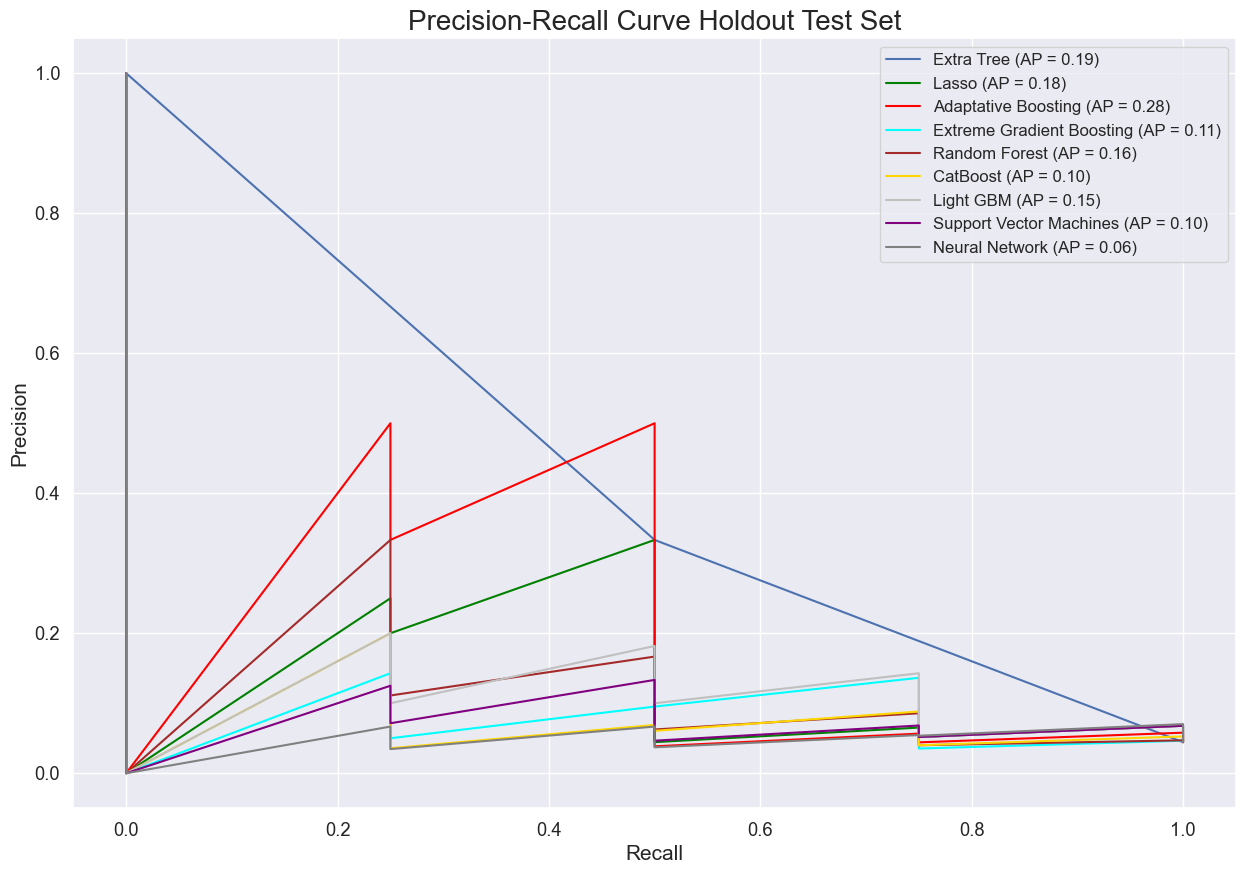

In [36]:
# Precission Recall Curve
precision_plot = {}
recall_plot = {}
threshold_plot = {}
average_precision_plot = {}

precision_plot['ExtraTree'] , recall_plot['ExtraTree'] , threshold_plot['ExtraTree'] = precision_recall_curve(Y_test, results_plots['ExtraTree']['probas'][: , 1])
average_precision_plot['ExtraTree'] = average_precision_score(Y_test, results_plots['ExtraTree']['probas'][: , 1])

precision_plot[model_to_test_names[0]] , recall_plot[model_to_test_names[0]] , threshold_plot[model_to_test_names[0]] = precision_recall_curve(Y_test, results_plots[model_to_test_names[0]]['probas'][: , 1])
average_precision_plot[model_to_test_names[0]] = average_precision_score(Y_test, results_plots[model_to_test_names[0]]['probas'][: , 1])

precision_plot[model_to_test_names[1]] , recall_plot[model_to_test_names[1]] , threshold_plot[model_to_test_names[1]] = precision_recall_curve(Y_test, results_plots[model_to_test_names[1]]['probas'][: , 1])
average_precision_plot[model_to_test_names[1]] = average_precision_score(Y_test, results_plots[model_to_test_names[1]]['probas'][: , 1])

precision_plot[model_to_test_names[2]] , recall_plot[model_to_test_names[2]] , threshold_plot[model_to_test_names[2]] = precision_recall_curve(Y_test, results_plots[model_to_test_names[2]]['probas'][: , 1])
average_precision_plot[model_to_test_names[2]] = average_precision_score(Y_test, results_plots[model_to_test_names[2]]['probas'][: , 1])

precision_plot[model_to_test_names[2]] , recall_plot[model_to_test_names[2]] , threshold_plot[model_to_test_names[2]] = precision_recall_curve(Y_test, results_plots[model_to_test_names[2]]['probas'][: , 1])
average_precision_plot[model_to_test_names[2]] = average_precision_score(Y_test, results_plots[model_to_test_names[2]]['probas'][: , 1])

precision_plot[model_to_test_names[3]] , recall_plot[model_to_test_names[3]] , threshold_plot[model_to_test_names[3]] = precision_recall_curve(Y_test, results_plots[model_to_test_names[3]]['probas'][: , 1])
average_precision_plot[model_to_test_names[3]] = average_precision_score(Y_test, results_plots[model_to_test_names[3]]['probas'][: , 1])

precision_plot[model_to_test_names[4]] , recall_plot[model_to_test_names[4]] , threshold_plot[model_to_test_names[4]] = precision_recall_curve(Y_test, results_plots[model_to_test_names[4]]['probas'][: , 1])
average_precision_plot[model_to_test_names[4]] = average_precision_score(Y_test, results_plots[model_to_test_names[4]]['probas'][: , 1])

precision_plot[model_to_test_names[5]] , recall_plot[model_to_test_names[5]] , threshold_plot[model_to_test_names[5]] = precision_recall_curve(Y_test, results_plots[model_to_test_names[5]]['probas'][: , 1])
average_precision_plot[model_to_test_names[5]] = average_precision_score(Y_test, results_plots[model_to_test_names[5]]['probas'][: , 1])

precision_plot[model_to_test_names[6]] , recall_plot[model_to_test_names[6]] , threshold_plot[model_to_test_names[6]] = precision_recall_curve(Y_test, results_plots[model_to_test_names[6]]['probas'][: , 1])
average_precision_plot[model_to_test_names[6]] = average_precision_score(Y_test, results_plots[model_to_test_names[6]]['probas'][: , 1])

precision_plot[model_to_test_names[7]] , recall_plot[model_to_test_names[7]] , threshold_plot[model_to_test_names[7]] = precision_recall_curve(Y_test, results_plots[model_to_test_names[7]]['probas'][: , 1])
average_precision_plot[model_to_test_names[7]] = average_precision_score(Y_test, results_plots[model_to_test_names[7]]['probas'][: , 1])

# Plot the precision-recall curve
plt.figure(figsize=(15, 10))
plt.plot(recall_plot['ExtraTree'], precision_plot['ExtraTree'], label = f"Extra Tree (AP = {average_precision_plot['ExtraTree']:.2f})", color='b')
plt.plot(recall_plot[model_to_test_names[0]], precision_plot[model_to_test_names[0]], label = f"{model_to_test_names[0]} (AP = {average_precision_plot[model_to_test_names[0]]:.2f})", color='green')
plt.plot(recall_plot[model_to_test_names[1]], precision_plot[model_to_test_names[1]], label = f"{model_to_test_names[1]} (AP = {average_precision_plot[model_to_test_names[1]]:.2f})", color='red')
plt.plot(recall_plot[model_to_test_names[2]], precision_plot[model_to_test_names[2]], label = f"{model_to_test_names[2]} (AP = {average_precision_plot[model_to_test_names[2]]:.2f})", color='cyan')
plt.plot(recall_plot[model_to_test_names[3]], precision_plot[model_to_test_names[3]], label = f"{model_to_test_names[3]} (AP = {average_precision_plot[model_to_test_names[3]]:.2f})", color='brown')
plt.plot(recall_plot[model_to_test_names[4]], precision_plot[model_to_test_names[4]], label = f"{model_to_test_names[4]} (AP = {average_precision_plot[model_to_test_names[4]]:.2f})", color='gold')
plt.plot(recall_plot[model_to_test_names[5]], precision_plot[model_to_test_names[5]], label = f"{model_to_test_names[5]} (AP = {average_precision_plot[model_to_test_names[5]]:.2f})", color='silver')
plt.plot(recall_plot[model_to_test_names[6]], precision_plot[model_to_test_names[6]], label = f"{model_to_test_names[6]} (AP = {average_precision_plot[model_to_test_names[6]]:.2f})", color='purple')
plt.plot(recall_plot[model_to_test_names[7]], precision_plot[model_to_test_names[7]], label = f"{model_to_test_names[7]} (AP = {average_precision_plot[model_to_test_names[7]]:.2f})", color='gray')
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)
plt.title('Precision-Recall Curve Holdout Test Set', fontsize=20)
plt.legend(loc='best', fontsize=12)
plt.savefig(r'..\results\precision_recall_plot_random_test_with_configuration.png')
plt.show()

## **3.2 Cross Validation**

In [38]:
results_plots = {}
# Perform imputation
X2 = pd.DataFrame(KNNImputer().fit_transform(X) , columns = X.columns)

# Perform Scaling
X2[new_num_columns] = MinMaxScaler().fit_transform(X2[new_num_columns])

# Perform oversampling
X2 , Y2 = RandomOverSampler().fit_resample(X2 , Y)

# Create a object for cross validation
skf = StratifiedKFold(10)
results = {}
# Train model with cross validation
for i, (train_index, test_index) in enumerate(skf.split(X2, Y2)):
    X_train = X2.loc[train_index]
    X_test = X2.loc[test_index]
    Y_train = Y2.loc[train_index]
    Y_test = Y2.loc[test_index]
    aux_parameters = {'criterion': 'entropy',
                     'min_samples_split': 10,
                     'class_weight': None,
                     'max_features': 'log2'}
    model = ExtraTreeClassifier(**aux_parameters).fit(X_train , Y_train)
    
    probas = model.predict_proba(X_test)
    y_pred = np.select(condlist = [probas[ : , 1] >= threshold],
                  choicelist = [1],
                  default = 0)

    # Evaluate with F1 Score
    f1 = f1_score(Y_test , y_pred , average = 'macro')
    precision = precision_score(Y_test ,  y_pred , average = 'macro')
    recall = recall_score(Y_test ,  y_pred , average = 'macro')
    accuracy = accuracy_score(Y_test ,  y_pred)
    roc_auc = roc_auc_score(Y_test ,  y_pred)
    
    results[i] = {'f1' : f1,
                 'precision' : precision,
                 'recall' : recall,
                 'accuracy' : accuracy,
                 'roc_auc' : roc_auc}
    
print('Results for best model')
print('-' * 50)
print('F1 Score')
print(f"Mean: {np.mean([results[i]['f1'] for i in results.keys()])} , SD: {np.std([results[i]['f1'] for i in results.keys()])}")
print('CI 95%')
print(stats.t.interval(0.95, df = len([results[i]['f1'] for i in results.keys()])-1, 
                loc = np.mean([results[i]['f1'] for i in results.keys()]), 
                scale = stats.sem([results[i]['f1'] for i in results.keys()])))
print('-' * 50)
print('Precision')
print(f"Mean: {np.mean([results[i]['precision'] for i in results.keys()])} , SD: {np.std([results[i]['precision'] for i in results.keys()])}")
print('CI 95%')
print(stats.t.interval(0.95, df = len([results[i]['precision'] for i in results.keys()])-1, 
                loc = np.mean([results[i]['precision'] for i in results.keys()]), 
                scale = stats.sem([results[i]['precision'] for i in results.keys()])))
print('-' * 50)
print('Recall')
print(f"Mean: {np.mean([results[i]['recall'] for i in results.keys()])} , SD: {np.std([results[i]['recall'] for i in results.keys()])}")
print('CI 95%')
print(stats.t.interval(0.95, df = len([results[i]['recall'] for i in results.keys()])-1, 
                loc = np.mean([results[i]['recall'] for i in results.keys()]), 
                scale = stats.sem([results[i]['recall'] for i in results.keys()])))
print('-' * 50)
print('Accuracy')
print(f"Mean: {np.mean([results[i]['accuracy'] for i in results.keys()])} , SD: {np.std([results[i]['accuracy'] for i in results.keys()])}")
print('CI 95%')
print(stats.t.interval(0.95, df = len([results[i]['accuracy'] for i in results.keys()])-1, 
                loc = np.mean([results[i]['accuracy'] for i in results.keys()]), 
                scale = stats.sem([results[i]['accuracy'] for i in results.keys()])))
print('-' * 50)
print('ROC AUC')
print(f"Mean: {np.mean([results[i]['roc_auc'] for i in results.keys()])} , SD: {np.std([results[i]['roc_auc'] for i in results.keys()])}")
print('CI 95%')
print(stats.t.interval(0.95, df = len([results[i]['roc_auc'] for i in results.keys()])-1, 
                loc = np.mean([results[i]['roc_auc'] for i in results.keys()]), 
                scale = stats.sem([results[i]['roc_auc'] for i in results.keys()])))

# Save information
results_plots['ExtraTree'] = {'probas' : probas,
                           'y_pred' : y_pred,
                           'ROC' : np.mean([results[i]['roc_auc'] for i in results.keys()])}

Results for best model
--------------------------------------------------
F1 Score
Mean: 0.8976513423932074 , SD: 0.053979961092457646
CI 95%
(0.8569476238499464, 0.9383550609364685)
--------------------------------------------------
Precision
Mean: 0.9191486691284163 , SD: 0.03293001852533162
CI 95%
(0.8943177100363255, 0.9439796282205071)
--------------------------------------------------
Recall
Mean: 0.8996308664380364 , SD: 0.0512163042856653
CI 95%
(0.8610110899083897, 0.938250642967683)
--------------------------------------------------
Accuracy
Mean: 0.899656700996567 , SD: 0.05115777690750314
CI 95%
(0.8610810571761623, 0.9382323448169717)
--------------------------------------------------
ROC AUC
Mean: 0.8996308664380364 , SD: 0.05121630428566527
CI 95%
(0.8610110899083897, 0.938250642967683)


In [39]:
# Results for other models
for iii in models_to_test:
    print('#' * 50)
    print('Training with model' , iii)
    results = {}
    # Train model with cross validation
    for ii, (train_index, test_index) in enumerate(skf.split(X2, Y2)):
        X_train = X2.loc[train_index]
        X_test = X2.loc[test_index]
        Y_train = Y2.loc[train_index]
        Y_test = Y2.loc[test_index]
        
        model = iii.fit(X_train , Y_train)

        probas = model.predict_proba(X_test)
        y_pred = np.select(condlist = [probas[ : , 1] >= threshold],
                      choicelist = [1],
                      default = 0)

        # Evaluate with F1 Score
        f1 = f1_score(Y_test , y_pred , average = 'macro')
        precision = precision_score(Y_test ,  y_pred , average = 'macro')
        recall = recall_score(Y_test ,  y_pred , average = 'macro')
        accuracy = accuracy_score(Y_test ,  y_pred)
        roc_auc = roc_auc_score(Y_test ,  y_pred)

        results[ii] = {'f1' : f1,
                     'precision' : precision,
                     'recall' : recall,
                     'accuracy' : accuracy,
                     'roc_auc' : roc_auc}

    print('Metrics')
    print('-' * 50)
    print('F1 Score')
    print(f"Mean: {np.mean([results[i]['f1'] for i in results.keys()])} , SD: {np.std([results[i]['f1'] for i in results.keys()])}")
    print('CI 95%')
    print(stats.t.interval(0.95, df = len([results[i]['f1'] for i in results.keys()])-1, 
                    loc = np.mean([results[i]['f1'] for i in results.keys()]), 
                    scale = stats.sem([results[i]['f1'] for i in results.keys()])))
    print('-' * 50)
    print('Precision')
    print(f"Mean: {np.mean([results[i]['precision'] for i in results.keys()])} , SD: {np.std([results[i]['precision'] for i in results.keys()])}")
    print('CI 95%')
    print(stats.t.interval(0.95, df = len([results[i]['precision'] for i in results.keys()])-1, 
                    loc = np.mean([results[i]['precision'] for i in results.keys()]), 
                    scale = stats.sem([results[i]['precision'] for i in results.keys()])))
    print('-' * 50)
    print('Recall')
    print(f"Mean: {np.mean([results[i]['recall'] for i in results.keys()])} , SD: {np.std([results[i]['recall'] for i in results.keys()])}")
    print('CI 95%')
    print(stats.t.interval(0.95, df = len([results[i]['recall'] for i in results.keys()])-1, 
                    loc = np.mean([results[i]['recall'] for i in results.keys()]), 
                    scale = stats.sem([results[i]['recall'] for i in results.keys()])))
    print('-' * 50)
    print('Accuracy')
    print(f"Mean: {np.mean([results[i]['accuracy'] for i in results.keys()])} , SD: {np.std([results[i]['accuracy'] for i in results.keys()])}")
    print('CI 95%')
    print(stats.t.interval(0.95, df = len([results[i]['accuracy'] for i in results.keys()])-1, 
                    loc = np.mean([results[i]['accuracy'] for i in results.keys()]), 
                    scale = stats.sem([results[i]['accuracy'] for i in results.keys()])))
    print('-' * 50)
    print('ROC AUC')
    print(f"Mean: {np.mean([results[i]['roc_auc'] for i in results.keys()])} , SD: {np.std([results[i]['roc_auc'] for i in results.keys()])}")
    print('CI 95%')
    print(stats.t.interval(0.95, df = len([results[i]['roc_auc'] for i in results.keys()])-1, 
                    loc = np.mean([results[i]['roc_auc'] for i in results.keys()]), 
                    scale = stats.sem([results[i]['roc_auc'] for i in results.keys()])))
    
    # Save information
    results_plots[model_to_test_names[models_to_test.index(iii)]] = {'probas' : probas,
                               'y_pred' : y_pred,
                               'ROC' : np.mean([results[i]['roc_auc'] for i in results.keys()])}

##################################################
Training with model LogisticRegression()
Metrics
--------------------------------------------------
F1 Score
Mean: 0.4704656324411068 , SD: 0.08828819464469555
CI 95%
(0.40389170847411715, 0.5370395564080964)
--------------------------------------------------
Precision
Mean: 0.4982679488827578 , SD: 0.11547047743733764
CI 95%
(0.4111971596760927, 0.5853387380894229)
--------------------------------------------------
Recall
Mean: 0.5117603984574121 , SD: 0.06412040956374868
CI 95%
(0.4634102505332387, 0.5601105463815854)
--------------------------------------------------
Accuracy
Mean: 0.5117823217678231 , SD: 0.0639891678142213
CI 95%
(0.4635311369982311, 0.5600335065374151)
--------------------------------------------------
ROC AUC
Mean: 0.5117603984574121 , SD: 0.06412040956374868
CI 95%
(0.4634102505332387, 0.5601105463815854)
##################################################
Training with model AdaBoostClassifier()
Metrics
-------

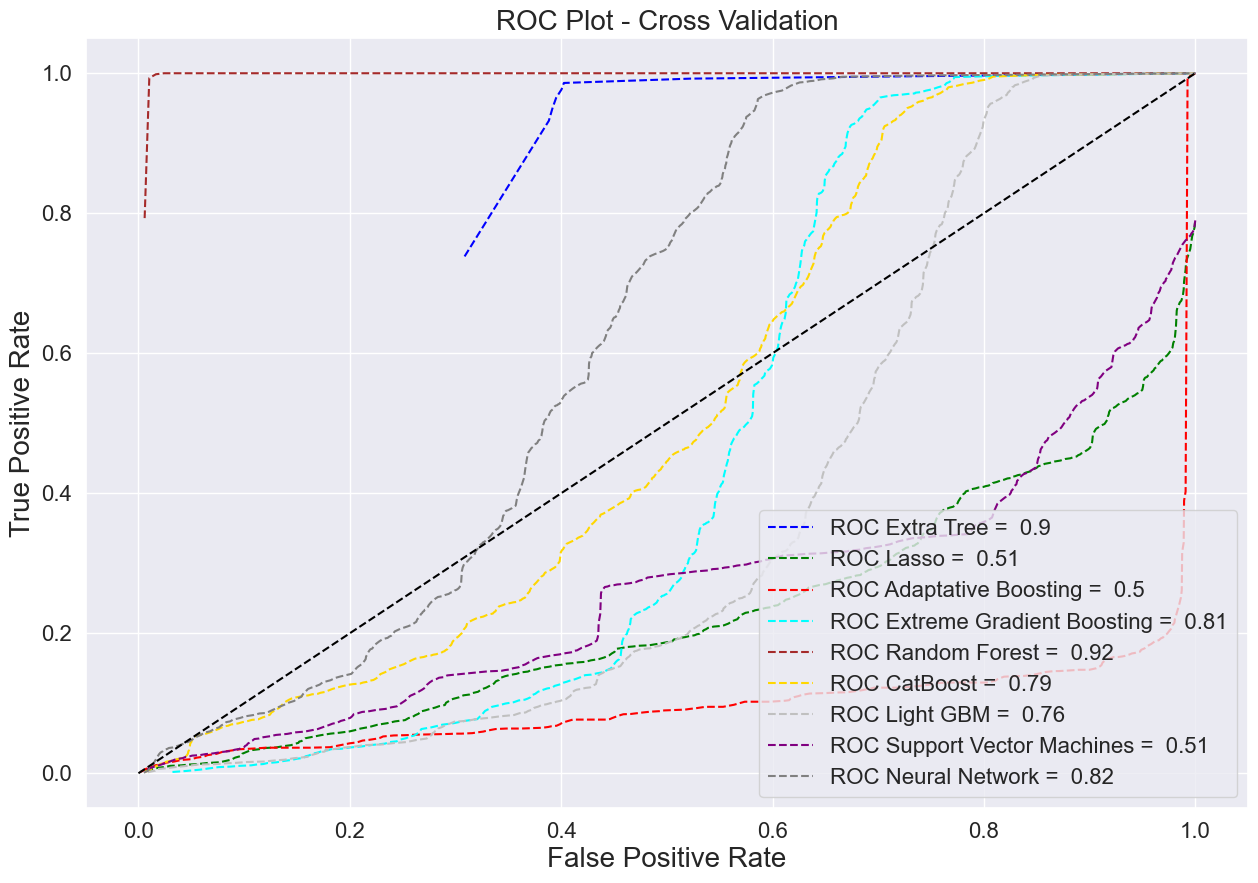

In [40]:
# ROC AUC Plot
fpr = {}
tpr = {}
smooth_fpr = {}
smooth_tpr = {}
interp_smooth_tpr = {}

fpr[model_to_test_names[0]] , tpr[model_to_test_names[0]] , _ = roc_curve(Y_test, results_plots[model_to_test_names[0]]['probas'][: , 1])
smooth_fpr[model_to_test_names[0]], smooth_tpr[model_to_test_names[0]] = smooth_roc_curve(fpr[model_to_test_names[0]], tpr[model_to_test_names[0]], window_size=5)
interp_smooth_tpr[model_to_test_names[0]] = interp1d(smooth_fpr[model_to_test_names[0]], smooth_tpr[model_to_test_names[0]] , kind='linear', fill_value='extrapolate')

fpr[model_to_test_names[1]] , tpr[model_to_test_names[1]] , _ = roc_curve(Y_test, results_plots[model_to_test_names[1]]['probas'][: , 1])
smooth_fpr[model_to_test_names[1]], smooth_tpr[model_to_test_names[1]] = smooth_roc_curve(fpr[model_to_test_names[1]], tpr[model_to_test_names[1]], window_size=5)
interp_smooth_tpr[model_to_test_names[1]] = interp1d(smooth_fpr[model_to_test_names[1]], smooth_tpr[model_to_test_names[1]] , kind='linear', fill_value='extrapolate')

fpr[model_to_test_names[2]] , tpr[model_to_test_names[2]] , _ = roc_curve(Y_test, results_plots[model_to_test_names[2]]['probas'][: , 1])
smooth_fpr[model_to_test_names[2]], smooth_tpr[model_to_test_names[2]] = smooth_roc_curve(fpr[model_to_test_names[2]], tpr[model_to_test_names[2]], window_size=5)
interp_smooth_tpr[model_to_test_names[2]] = interp1d(smooth_fpr[model_to_test_names[2]], smooth_tpr[model_to_test_names[2]] , kind='linear', fill_value='extrapolate')

fpr[model_to_test_names[3]] , tpr[model_to_test_names[3]] , _ = roc_curve(Y_test, results_plots[model_to_test_names[3]]['probas'][: , 1])
smooth_fpr[model_to_test_names[3]], smooth_tpr[model_to_test_names[3]] = smooth_roc_curve(fpr[model_to_test_names[3]], tpr[model_to_test_names[3]], window_size=5)
interp_smooth_tpr[model_to_test_names[3]] = interp1d(smooth_fpr[model_to_test_names[3]], smooth_tpr[model_to_test_names[3]] , kind='linear', fill_value='extrapolate')

fpr[model_to_test_names[4]] , tpr[model_to_test_names[4]] , _ = roc_curve(Y_test, results_plots[model_to_test_names[4]]['probas'][: , 1])
smooth_fpr[model_to_test_names[4]], smooth_tpr[model_to_test_names[4]] = smooth_roc_curve(fpr[model_to_test_names[4]], tpr[model_to_test_names[4]], window_size=5)
interp_smooth_tpr[model_to_test_names[4]] = interp1d(smooth_fpr[model_to_test_names[4]], smooth_tpr[model_to_test_names[4]] , kind='linear', fill_value='extrapolate')

fpr[model_to_test_names[5]] , tpr[model_to_test_names[5]] , _ = roc_curve(Y_test, results_plots[model_to_test_names[5]]['probas'][: , 1])
smooth_fpr[model_to_test_names[5]], smooth_tpr[model_to_test_names[5]] = smooth_roc_curve(fpr[model_to_test_names[5]], tpr[model_to_test_names[5]], window_size=5)
interp_smooth_tpr[model_to_test_names[5]] = interp1d(smooth_fpr[model_to_test_names[5]], smooth_tpr[model_to_test_names[5]] , kind='linear', fill_value='extrapolate')

fpr[model_to_test_names[6]] , tpr[model_to_test_names[6]] , _ = roc_curve(Y_test, results_plots[model_to_test_names[6]]['probas'][: , 1])
smooth_fpr[model_to_test_names[6]], smooth_tpr[model_to_test_names[6]] = smooth_roc_curve(fpr[model_to_test_names[6]], tpr[model_to_test_names[6]], window_size=5)
interp_smooth_tpr[model_to_test_names[6]] = interp1d(smooth_fpr[model_to_test_names[6]], smooth_tpr[model_to_test_names[6]] , kind='linear', fill_value='extrapolate')

fpr[model_to_test_names[7]] , tpr[model_to_test_names[7]] , _ = roc_curve(Y_test, results_plots[model_to_test_names[7]]['probas'][: , 1])
smooth_fpr[model_to_test_names[7]], smooth_tpr[model_to_test_names[7]] = smooth_roc_curve(fpr[model_to_test_names[7]], tpr[model_to_test_names[7]], window_size=5)
interp_smooth_tpr[model_to_test_names[7]] = interp1d(smooth_fpr[model_to_test_names[7]], smooth_tpr[model_to_test_names[7]] , kind='linear', fill_value='extrapolate')

fpr['ExtraTree'] , tpr['ExtraTree'] , _ = roc_curve(Y_test, results_plots['ExtraTree']['probas'][: , 1])
smooth_fpr['ExtraTree'], smooth_tpr['ExtraTree'] = smooth_roc_curve(fpr['ExtraTree'], tpr['ExtraTree'], window_size=5)
interp_smooth_tpr['ExtraTree'] = interp1d(smooth_fpr['ExtraTree'], smooth_tpr['ExtraTree'] , kind='linear', fill_value='extrapolate')


# ROC Curve
plt.rcParams["figure.figsize"] = (15,10)
plt.plot(smooth_fpr['ExtraTree'], interp_smooth_tpr['ExtraTree'](smooth_fpr['ExtraTree']), linestyle = '--' ,  label = 'ROC Extra Tree =  ' + str(round(results_plots['ExtraTree']['ROC'] , 2)) , color = 'blue')
plt.plot(smooth_fpr[model_to_test_names[0]], interp_smooth_tpr[model_to_test_names[0]](smooth_fpr[model_to_test_names[0]]), linestyle = '--' ,  label = 'ROC ' +  str(model_to_test_names[0]) + ' =  ' + str(round(results_plots[model_to_test_names[0]]['ROC'] , 2)) , color = 'green')
plt.plot(smooth_fpr[model_to_test_names[1]], interp_smooth_tpr[model_to_test_names[1]](smooth_fpr[model_to_test_names[1]]), linestyle = '--' ,  label = 'ROC ' +  str(model_to_test_names[1]) + ' =  ' + str(round(results_plots[model_to_test_names[1]]['ROC'] , 2)) , color = 'red')
plt.plot(smooth_fpr[model_to_test_names[2]], interp_smooth_tpr[model_to_test_names[2]](smooth_fpr[model_to_test_names[2]]), linestyle = '--' ,  label = 'ROC ' +  str(model_to_test_names[2]) + ' =  ' + str(round(results_plots[model_to_test_names[2]]['ROC'] , 2)) , color = 'cyan')
plt.plot(smooth_fpr[model_to_test_names[3]], interp_smooth_tpr[model_to_test_names[3]](smooth_fpr[model_to_test_names[3]]), linestyle = '--' ,  label = 'ROC ' +  str(model_to_test_names[3]) + ' =  ' + str(round(results_plots[model_to_test_names[3]]['ROC'] , 2)) , color = 'brown')
plt.plot(smooth_fpr[model_to_test_names[4]], interp_smooth_tpr[model_to_test_names[4]](smooth_fpr[model_to_test_names[4]]), linestyle = '--' ,  label = 'ROC ' +  str(model_to_test_names[4]) + ' =  ' + str(round(results_plots[model_to_test_names[4]]['ROC'] , 2)) , color = 'gold')
plt.plot(smooth_fpr[model_to_test_names[5]], interp_smooth_tpr[model_to_test_names[5]](smooth_fpr[model_to_test_names[5]]), linestyle = '--' ,  label = 'ROC ' +  str(model_to_test_names[5]) + ' =  ' + str(round(results_plots[model_to_test_names[5]]['ROC'] , 2)) , color = 'silver')
plt.plot(smooth_fpr[model_to_test_names[6]], interp_smooth_tpr[model_to_test_names[6]](smooth_fpr[model_to_test_names[6]]), linestyle = '--' ,  label = 'ROC ' +  str(model_to_test_names[6]) + ' =  ' + str(round(results_plots[model_to_test_names[6]]['ROC'] , 2)) , color = 'purple')
plt.plot(smooth_fpr[model_to_test_names[7]], interp_smooth_tpr[model_to_test_names[7]](smooth_fpr[model_to_test_names[7]]), linestyle = '--' ,  label = 'ROC ' +  str(model_to_test_names[7]) + ' =  ' + str(round(results_plots[model_to_test_names[7]]['ROC'] , 2)) , color = 'gray')
# Diagonal
plt.plot(fpr['ExtraTree'] , fpr['ExtraTree'], linestyle='--', color='black')
# axis labels
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
# show the legend
plt.legend(loc='lower right' , fontsize = 16)
# Title
plt.title('ROC Plot - Cross Validation' , fontsize = 20)
# Export ROC Plot
plt.savefig(r'..\results\roc_plot_CV_with_configuration.png')
# show the plot
plt.show()

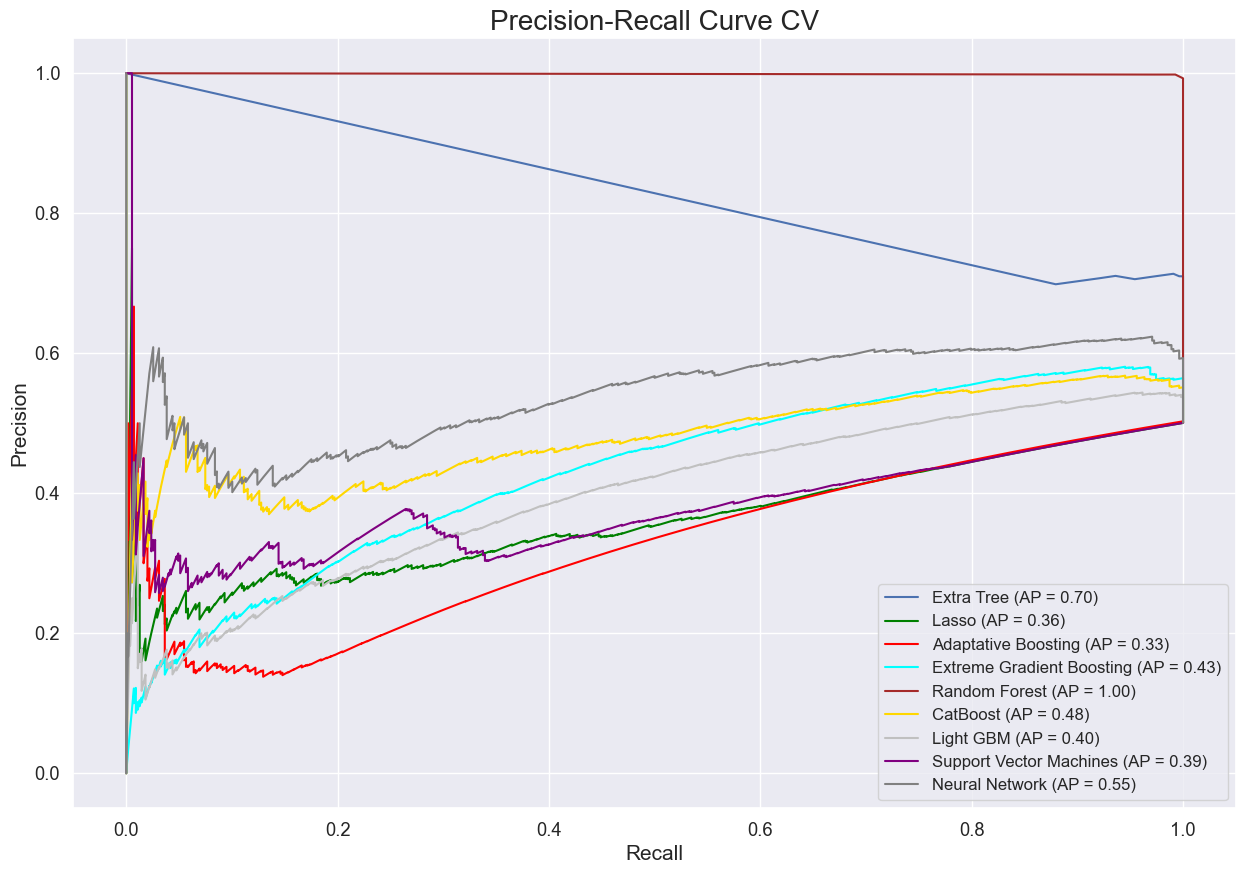

In [41]:
# Precission Recall Curve
precision_plot = {}
recall_plot = {}
threshold_plot = {}
average_precision_plot = {}

precision_plot['ExtraTree'] , recall_plot['ExtraTree'] , threshold_plot['ExtraTree'] = precision_recall_curve(Y_test, results_plots['ExtraTree']['probas'][: , 1])
average_precision_plot['ExtraTree'] = average_precision_score(Y_test, results_plots['ExtraTree']['probas'][: , 1])

precision_plot[model_to_test_names[0]] , recall_plot[model_to_test_names[0]] , threshold_plot[model_to_test_names[0]] = precision_recall_curve(Y_test, results_plots[model_to_test_names[0]]['probas'][: , 1])
average_precision_plot[model_to_test_names[0]] = average_precision_score(Y_test, results_plots[model_to_test_names[0]]['probas'][: , 1])

precision_plot[model_to_test_names[1]] , recall_plot[model_to_test_names[1]] , threshold_plot[model_to_test_names[1]] = precision_recall_curve(Y_test, results_plots[model_to_test_names[1]]['probas'][: , 1])
average_precision_plot[model_to_test_names[1]] = average_precision_score(Y_test, results_plots[model_to_test_names[1]]['probas'][: , 1])

precision_plot[model_to_test_names[2]] , recall_plot[model_to_test_names[2]] , threshold_plot[model_to_test_names[2]] = precision_recall_curve(Y_test, results_plots[model_to_test_names[2]]['probas'][: , 1])
average_precision_plot[model_to_test_names[2]] = average_precision_score(Y_test, results_plots[model_to_test_names[2]]['probas'][: , 1])

precision_plot[model_to_test_names[2]] , recall_plot[model_to_test_names[2]] , threshold_plot[model_to_test_names[2]] = precision_recall_curve(Y_test, results_plots[model_to_test_names[2]]['probas'][: , 1])
average_precision_plot[model_to_test_names[2]] = average_precision_score(Y_test, results_plots[model_to_test_names[2]]['probas'][: , 1])

precision_plot[model_to_test_names[3]] , recall_plot[model_to_test_names[3]] , threshold_plot[model_to_test_names[3]] = precision_recall_curve(Y_test, results_plots[model_to_test_names[3]]['probas'][: , 1])
average_precision_plot[model_to_test_names[3]] = average_precision_score(Y_test, results_plots[model_to_test_names[3]]['probas'][: , 1])

precision_plot[model_to_test_names[4]] , recall_plot[model_to_test_names[4]] , threshold_plot[model_to_test_names[4]] = precision_recall_curve(Y_test, results_plots[model_to_test_names[4]]['probas'][: , 1])
average_precision_plot[model_to_test_names[4]] = average_precision_score(Y_test, results_plots[model_to_test_names[4]]['probas'][: , 1])

precision_plot[model_to_test_names[5]] , recall_plot[model_to_test_names[5]] , threshold_plot[model_to_test_names[5]] = precision_recall_curve(Y_test, results_plots[model_to_test_names[5]]['probas'][: , 1])
average_precision_plot[model_to_test_names[5]] = average_precision_score(Y_test, results_plots[model_to_test_names[5]]['probas'][: , 1])

precision_plot[model_to_test_names[6]] , recall_plot[model_to_test_names[6]] , threshold_plot[model_to_test_names[6]] = precision_recall_curve(Y_test, results_plots[model_to_test_names[6]]['probas'][: , 1])
average_precision_plot[model_to_test_names[6]] = average_precision_score(Y_test, results_plots[model_to_test_names[6]]['probas'][: , 1])

precision_plot[model_to_test_names[7]] , recall_plot[model_to_test_names[7]] , threshold_plot[model_to_test_names[7]] = precision_recall_curve(Y_test, results_plots[model_to_test_names[7]]['probas'][: , 1])
average_precision_plot[model_to_test_names[7]] = average_precision_score(Y_test, results_plots[model_to_test_names[7]]['probas'][: , 1])

# Plot the precision-recall curve
plt.figure(figsize=(15, 10))
plt.plot(recall_plot['ExtraTree'], precision_plot['ExtraTree'], label = f"Extra Tree (AP = {average_precision_plot['ExtraTree']:.2f})", color='b')
plt.plot(recall_plot[model_to_test_names[0]], precision_plot[model_to_test_names[0]], label = f"{model_to_test_names[0]} (AP = {average_precision_plot[model_to_test_names[0]]:.2f})", color='green')
plt.plot(recall_plot[model_to_test_names[1]], precision_plot[model_to_test_names[1]], label = f"{model_to_test_names[1]} (AP = {average_precision_plot[model_to_test_names[1]]:.2f})", color='red')
plt.plot(recall_plot[model_to_test_names[2]], precision_plot[model_to_test_names[2]], label = f"{model_to_test_names[2]} (AP = {average_precision_plot[model_to_test_names[2]]:.2f})", color='cyan')
plt.plot(recall_plot[model_to_test_names[3]], precision_plot[model_to_test_names[3]], label = f"{model_to_test_names[3]} (AP = {average_precision_plot[model_to_test_names[3]]:.2f})", color='brown')
plt.plot(recall_plot[model_to_test_names[4]], precision_plot[model_to_test_names[4]], label = f"{model_to_test_names[4]} (AP = {average_precision_plot[model_to_test_names[4]]:.2f})", color='gold')
plt.plot(recall_plot[model_to_test_names[5]], precision_plot[model_to_test_names[5]], label = f"{model_to_test_names[5]} (AP = {average_precision_plot[model_to_test_names[5]]:.2f})", color='silver')
plt.plot(recall_plot[model_to_test_names[6]], precision_plot[model_to_test_names[6]], label = f"{model_to_test_names[6]} (AP = {average_precision_plot[model_to_test_names[6]]:.2f})", color='purple')
plt.plot(recall_plot[model_to_test_names[7]], precision_plot[model_to_test_names[7]], label = f"{model_to_test_names[7]} (AP = {average_precision_plot[model_to_test_names[7]]:.2f})", color='gray')
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)
plt.title('Precision-Recall Curve CV', fontsize=20)
plt.legend(loc='best', fontsize=12)
plt.savefig(r'..\results\precision_recall_plot_CV_with_configuration.png')
plt.show()

# **4. Feature Importance**

In [42]:
# Train modle with CV
# Perform imputation
X2 = pd.DataFrame(KNNImputer().fit_transform(X) , columns = X.columns)

# Perform Scaling
X2[new_num_columns] = MinMaxScaler().fit_transform(X2[new_num_columns])

# Perform oversampling
X2 , Y2 = RandomOverSampler().fit_resample(X2 , Y)

# Create a object for cross validation
skf = StratifiedKFold(10)
results = {}
# Train model with cross validation
for i, (train_index, test_index) in enumerate(skf.split(X2, Y2)):
    X_train = X2.loc[train_index]
    X_test = X2.loc[test_index]
    Y_train = Y2.loc[train_index]
    Y_test = Y2.loc[test_index]
    aux_parameters = {'criterion': 'entropy',
                     'min_samples_split': 10,
                     'class_weight': None,
                     'max_features': 'log2'}
    model = ExtraTreeClassifier(**aux_parameters).fit(X_train , Y_train)
    
    probas = model.predict_proba(X_test)
    y_pred = np.select(condlist = [probas[ : , 1] >= threshold],
                  choicelist = [1],
                  default = 0)

    # Evaluate with F1 Score
    f1 = f1_score(Y_test , y_pred , average = 'macro')
    precision = precision_score(Y_test ,  y_pred , average = 'macro')
    recall = recall_score(Y_test ,  y_pred , average = 'macro')
    accuracy = accuracy_score(Y_test ,  y_pred)
    roc_auc = roc_auc_score(Y_test ,  y_pred)
    
    results[i] = {'f1' : f1,
                 'precision' : precision,
                 'recall' : recall,
                 'accuracy' : accuracy,
                 'roc_auc' : roc_auc}
    
print('Results for best model')
print('-' * 50)
print('F1 Score')
print(f"Mean: {np.mean([results[i]['f1'] for i in results.keys()])} , SD: {np.std([results[i]['f1'] for i in results.keys()])}")
print('CI 95%')
print(stats.t.interval(0.95, df = len([results[i]['f1'] for i in results.keys()])-1, 
                loc = np.mean([results[i]['f1'] for i in results.keys()]), 
                scale = stats.sem([results[i]['f1'] for i in results.keys()])))
print('-' * 50)
print('Precision')
print(f"Mean: {np.mean([results[i]['precision'] for i in results.keys()])} , SD: {np.std([results[i]['precision'] for i in results.keys()])}")
print('CI 95%')
print(stats.t.interval(0.95, df = len([results[i]['precision'] for i in results.keys()])-1, 
                loc = np.mean([results[i]['precision'] for i in results.keys()]), 
                scale = stats.sem([results[i]['precision'] for i in results.keys()])))
print('-' * 50)
print('Recall')
print(f"Mean: {np.mean([results[i]['recall'] for i in results.keys()])} , SD: {np.std([results[i]['recall'] for i in results.keys()])}")
print('CI 95%')
print(stats.t.interval(0.95, df = len([results[i]['recall'] for i in results.keys()])-1, 
                loc = np.mean([results[i]['recall'] for i in results.keys()]), 
                scale = stats.sem([results[i]['recall'] for i in results.keys()])))
print('-' * 50)
print('Accuracy')
print(f"Mean: {np.mean([results[i]['accuracy'] for i in results.keys()])} , SD: {np.std([results[i]['accuracy'] for i in results.keys()])}")
print('CI 95%')
print(stats.t.interval(0.95, df = len([results[i]['accuracy'] for i in results.keys()])-1, 
                loc = np.mean([results[i]['accuracy'] for i in results.keys()]), 
                scale = stats.sem([results[i]['accuracy'] for i in results.keys()])))
print('-' * 50)
print('ROC AUC')
print(f"Mean: {np.mean([results[i]['roc_auc'] for i in results.keys()])} , SD: {np.std([results[i]['roc_auc'] for i in results.keys()])}")
print('CI 95%')
print(stats.t.interval(0.95, df = len([results[i]['roc_auc'] for i in results.keys()])-1, 
                loc = np.mean([results[i]['roc_auc'] for i in results.keys()]), 
                scale = stats.sem([results[i]['roc_auc'] for i in results.keys()])))

Results for best model
--------------------------------------------------
F1 Score
Mean: 0.891228037715108 , SD: 0.08024905085714011
CI 95%
(0.8307160493152261, 0.9517400261149898)
--------------------------------------------------
Precision
Mean: 0.9175563585102804 , SD: 0.04323944964118183
CI 95%
(0.8849515482706878, 0.950161168749873)
--------------------------------------------------
Recall
Mean: 0.8948593189127158 , SD: 0.07284395940796752
CI 95%
(0.8399311574003332, 0.9497874804250983)
--------------------------------------------------
Accuracy
Mean: 0.8948989267739893 , SD: 0.0727460615663459
CI 95%
(0.8400445853628205, 0.9497532681851582)
--------------------------------------------------
ROC AUC
Mean: 0.8948593189127158 , SD: 0.0728439594079675
CI 95%
(0.8399311574003332, 0.9497874804250983)


In [44]:
importances = model.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': X.columns.tolist(),
    'Importance': importances
}).sort_values(by = 'Importance' , ascending = False)
feature_importances

,Feature,Importance
2,bmi,0.122204
4,preoperative_hemoglobin_level,0.116634
1,age,0.096758
18,data_group_encoded,0.076414
9,operation,0.064142
6,asa_score,0.061698
3,active_smoking,0.060133
14,anastomotic_configuration,0.050149
7,prior_abdominal_surgery,0.049298
13,anastomotic_technique,0.048522


In [47]:
# Modify feature names
new_feature_names = {'sex' : 'Sex',
                    'active_smoking' : 'Active Smoking',
                    'surgeon_experience' : 'Surgeon Experience',
                    'age' : 'Age',
                    'preoperative_hemoglobin_level' : 'Hemoglobin',
                    'bmi' : 'BMI',
                    'asa_score' : 'ASA Score',
                    'emergency_surgery' : 'Emergency Surgery',
                    'prior_abdominal_surgery' : 'Prior Abdominal Surgery',
                    'operation' : 'Operation',
                    'anastomotic_technique' : 'Anastomotic Technique',
                    'approach' : 'Approach',
                    'BIHistoryOfIschaemicHeartDisease' : 'Ischaemic Heart Disease',
                    'BIHistoryOfDiabetes' : 'Diabetes',
                    'indication' : 'Indication',
                    'type_of_anastomosis -> das von UK sind alles  Ileocolonic anastomosis' : 'Type of Anastomosis',
                    'neoadjuvant_therapy' : 'Neoadjuvant Therapy',
                    'anastomotic_configuration' : 'Anastomotic Configuration'}
feature_importances = feature_importances[feature_importances['Feature'] != 'data_group_encoded']
feature_importances['New_Feature_Name'] = feature_importances['Feature'].map(new_feature_names)
feature_importances

,Feature,Importance,New_Feature_Name
2,bmi,0.122204,BMI
4,preoperative_hemoglobin_level,0.116634,Hemoglobin
1,age,0.096758,Age
9,operation,0.064142,Operation
6,asa_score,0.061698,ASA Score
3,active_smoking,0.060133,Active Smoking
14,anastomotic_configuration,0.050149,Anastomotic Configuration
7,prior_abdominal_surgery,0.049298,Prior Abdominal Surgery
13,anastomotic_technique,0.048522,Anastomotic Technique
8,indication,0.047107,Indication


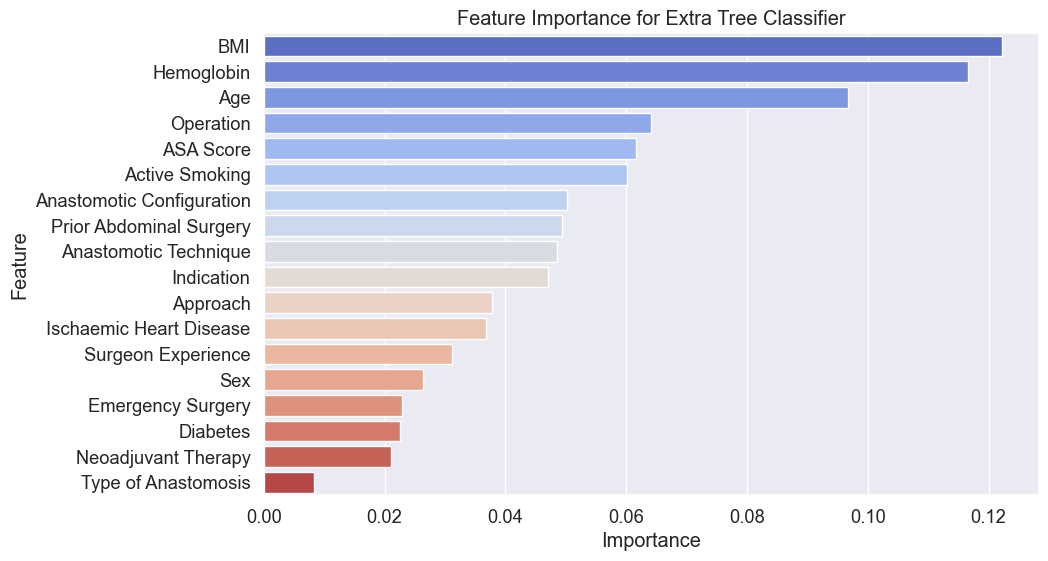

In [48]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='New_Feature_Name', data=feature_importances, palette='coolwarm')

# Personalizar el gráfico
plt.title('Feature Importance for Extra Tree Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig(r'..\results\feature_importance_with_configuration.png', format='png', dpi=400, bbox_inches='tight')
plt.show()

# **5. Calibration Plot**

In [49]:
# Train modle with CV
# Perform imputation
X2 = pd.DataFrame(KNNImputer().fit_transform(X) , columns = X.columns)

# Perform Scaling
X2[new_num_columns] = MinMaxScaler().fit_transform(X2[new_num_columns])

# Perform oversampling
X2 , Y2 = RandomOverSampler().fit_resample(X2 , Y)

# Create a object for cross validation
skf = StratifiedKFold(10)
results = {}
# Train model with cross validation
for i, (train_index, test_index) in enumerate(skf.split(X2, Y2)):
    X_train = X2.loc[train_index]
    X_test = X2.loc[test_index]
    Y_train = Y2.loc[train_index]
    Y_test = Y2.loc[test_index]
    aux_parameters = {'criterion': 'entropy',
                     'min_samples_split': 10,
                     'class_weight': None,
                     'max_features': 'log2'}
    model = ExtraTreeClassifier(**aux_parameters).fit(X_train , Y_train)
    
    probas = model.predict_proba(X_test)
    y_pred = np.select(condlist = [probas[ : , 1] >= threshold],
                  choicelist = [1],
                  default = 0)

    # Evaluate with F1 Score
    f1 = f1_score(Y_test , y_pred , average = 'macro')
    precision = precision_score(Y_test ,  y_pred , average = 'macro')
    recall = recall_score(Y_test ,  y_pred , average = 'macro')
    accuracy = accuracy_score(Y_test ,  y_pred)
    roc_auc = roc_auc_score(Y_test ,  y_pred)
    
    results[i] = {'f1' : f1,
                 'precision' : precision,
                 'recall' : recall,
                 'accuracy' : accuracy,
                 'roc_auc' : roc_auc}
    
print('Results for best model')
print('-' * 50)
print('F1 Score')
print(f"Mean: {np.mean([results[i]['f1'] for i in results.keys()])} , SD: {np.std([results[i]['f1'] for i in results.keys()])}")
print('CI 95%')
print(stats.t.interval(0.95, df = len([results[i]['f1'] for i in results.keys()])-1, 
                loc = np.mean([results[i]['f1'] for i in results.keys()]), 
                scale = stats.sem([results[i]['f1'] for i in results.keys()])))
print('-' * 50)
print('Precision')
print(f"Mean: {np.mean([results[i]['precision'] for i in results.keys()])} , SD: {np.std([results[i]['precision'] for i in results.keys()])}")
print('CI 95%')
print(stats.t.interval(0.95, df = len([results[i]['precision'] for i in results.keys()])-1, 
                loc = np.mean([results[i]['precision'] for i in results.keys()]), 
                scale = stats.sem([results[i]['precision'] for i in results.keys()])))
print('-' * 50)
print('Recall')
print(f"Mean: {np.mean([results[i]['recall'] for i in results.keys()])} , SD: {np.std([results[i]['recall'] for i in results.keys()])}")
print('CI 95%')
print(stats.t.interval(0.95, df = len([results[i]['recall'] for i in results.keys()])-1, 
                loc = np.mean([results[i]['recall'] for i in results.keys()]), 
                scale = stats.sem([results[i]['recall'] for i in results.keys()])))
print('-' * 50)
print('Accuracy')
print(f"Mean: {np.mean([results[i]['accuracy'] for i in results.keys()])} , SD: {np.std([results[i]['accuracy'] for i in results.keys()])}")
print('CI 95%')
print(stats.t.interval(0.95, df = len([results[i]['accuracy'] for i in results.keys()])-1, 
                loc = np.mean([results[i]['accuracy'] for i in results.keys()]), 
                scale = stats.sem([results[i]['accuracy'] for i in results.keys()])))
print('-' * 50)
print('ROC AUC')
print(f"Mean: {np.mean([results[i]['roc_auc'] for i in results.keys()])} , SD: {np.std([results[i]['roc_auc'] for i in results.keys()])}")
print('CI 95%')
print(stats.t.interval(0.95, df = len([results[i]['roc_auc'] for i in results.keys()])-1, 
                loc = np.mean([results[i]['roc_auc'] for i in results.keys()]), 
                scale = stats.sem([results[i]['roc_auc'] for i in results.keys()])))

Results for best model
--------------------------------------------------
F1 Score
Mean: 0.9052032386675128 , SD: 0.06297837227730053
CI 95%
(0.8577142466858915, 0.9526922306491342)
--------------------------------------------------
Precision
Mean: 0.9253638960232771 , SD: 0.036443281633608736
CI 95%
(0.897883752496192, 0.9528440395503621)
--------------------------------------------------
Recall
Mean: 0.9073733303086511 , SD: 0.05861189886202266
CI 95%
(0.863176888031126, 0.9515697725861761)
--------------------------------------------------
Accuracy
Mean: 0.9074063426990635 , SD: 0.05852829062021276
CI 95%
(0.8632729454158966, 0.9515397399822304)
--------------------------------------------------
ROC AUC
Mean: 0.9073733303086511 , SD: 0.05861189886202266
CI 95%
(0.863176888031126, 0.9515697725861761)


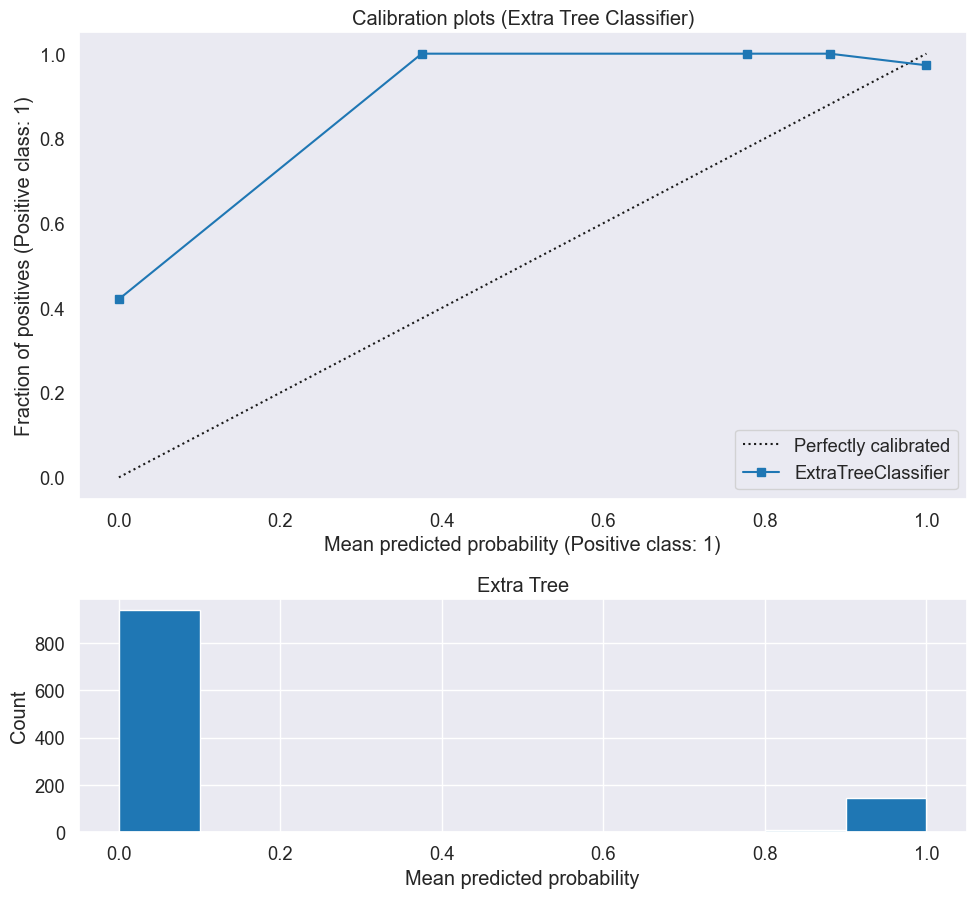

In [50]:
fig = plt.figure(figsize=(10, 12))
gs = GridSpec(3, 1, height_ratios=[2, 1, 1])
colors = '#1f77b4'

ax_calibration_curve = fig.add_subplot(gs[0 , 0])
display = CalibrationDisplay.from_estimator(
    best_model,
    X_test,
    Y_test,
    n_bins=10,
    name='ExtraTreeClassifier',
    ax=ax_calibration_curve,
    color=colors,
)

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots (Extra Tree Classifier)")

ax = fig.add_subplot(gs[1,0])

ax.hist(
    display.y_prob,
    range=(0, 1),
    bins=10,
    label='ExtraTreeClassifier',
    color=colors,
)
ax.set(title='Extra Tree', xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.savefig(r'..\results\calibration_plot_with_configuration.png', format='png', dpi=400, bbox_inches='tight')
plt.show()

# **6. Ablation Study**

## **6.1 Holdout Test Set**

In [65]:
# Load best model
with open(r'..\models\26_2_Best_Model_with_Configuration.pkl' , 'rb') as file:
    best_model = joblib.load(file)
best_model

Pipeline(steps=[('imputer', KNNImputer()),
                ('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling', MinMaxScaler(),
                                                  [1, 2, 4])])),
                ('sampler', RandomOverSampler()),
                ('classifier',
                 ExtraTreeClassifier(criterion='entropy', max_features='log2',
                                     min_samples_split=10))])

In [66]:
ablation_results = pd.DataFrame()
# Baseline metrics# Make X and Y for holdout with the best selection for the genecit algorithm
test_set_number = 2
threshold = 0.425
# Select the best values of each step and seed using Genetic Algorithms
X = df.drop(columns = TARGET).reset_index(drop = True)
Y = df[TARGET].reset_index(drop = True)

# Split data
test_index = X[X['data_group_encoded'] == test_set_number].index
train_index = X[X['data_group_encoded'] != test_set_number].index

X_train = X.loc[train_index]
Y_train = Y.loc[train_index]

X_test = X.loc[test_index]
Y_test = Y.loc[test_index]

probas = best_model.predict_proba(X_test)
y_pred = np.select(condlist = [probas[ : , 1] >= threshold],
              choicelist = [1],
              default = 0)

# Evaluate metrics
print('Metrics for best model:')
print(f"F1 Score: {f1_score(Y_test ,  y_pred , average = 'macro')}")
print(f"Recall Score: {recall_score(Y_test ,  y_pred , average = 'macro')}")
print(f"Precision Score: {precision_score(Y_test ,  y_pred , average = 'macro')}")
print(f"Accuracy Score: {accuracy_score(Y_test ,  y_pred)}")
print(f"ROC AUC Score: {roc_auc_score(Y_test ,  y_pred , average = 'macro')}")

# Add baseline results
ablation_results = pd.concat([ablation_results,
                              pd.DataFrame({'Model Type' : ['Full'],
                                           'F1' : [f1_score(Y_test ,  y_pred , average = 'macro')],
                                           'Recall' : [recall_score(Y_test ,  y_pred , average = 'macro')],
                                           'Precision' : [precision_score(Y_test ,  y_pred , average = 'macro')],
                                           'Accuracy' : [accuracy_score(Y_test ,  y_pred)],
                                           'ROC AUC' : [roc_auc_score(Y_test ,  y_pred)]})] ,
                             axis = 0)
ablation_results                              

Metrics for best model:
F1 Score: 0.6823529411764706
Recall Score: 0.7267441860465116
Precision Score: 0.6547619047619048
Accuracy Score: 0.9333333333333333
ROC AUC Score: 0.7267441860465117


,Model Type,F1,Recall,Precision,Accuracy,ROC AUC
0,Full,0.682353,0.726744,0.654762,0.933333,0.726744


In [67]:
# By removing samples for each value of approach
dict_values = {1.0 : "Laparoscopic",
              2.0 : "Robotic",
              3.0 :  "Open"}
for i in dict_values.keys():
    print('-' * 50)
    print('Removing values of approach =' , dict_values[i])
    # Remove values from approach
    aux_df = df[df['approach'] != i].copy()
    # Select the best values of each step and seed using Genetic Algorithms
    X = aux_df.drop(columns = TARGET).reset_index(drop = True)
    Y = aux_df[TARGET].reset_index(drop = True)

    # Split data
    test_index = X[X['data_group_encoded'] == test_set_number].index
    train_index = X[X['data_group_encoded'] != test_set_number].index

    X_train = X.loc[train_index]
    Y_train = Y.loc[train_index]
    
    # Re train model
    best_model.fit(X_train , Y_train)

    X_test = X.loc[test_index]
    Y_test = Y.loc[test_index]

    probas = best_model.predict_proba(X_test)
    y_pred = np.select(condlist = [probas[ : , 1] >= threshold],
                  choicelist = [1],
                  default = 0)

    # Evaluate metrics
    print('Metrics for best model:')
    print(f"F1 Score: {f1_score(Y_test ,  y_pred , average = 'macro')}")
    print(f"Recall Score: {recall_score(Y_test ,  y_pred , average = 'macro')}")
    print(f"Precision Score: {precision_score(Y_test ,  y_pred , average = 'macro')}")
    print(f"Accuracy Score: {accuracy_score(Y_test ,  y_pred)}")
    print(f"ROC AUC Score: {roc_auc_score(Y_test ,  y_pred , average = 'macro')}")

    # Add baseline results
    ablation_results = pd.concat([ablation_results,
                                  pd.DataFrame({'Model Type' : ['Witout Approach = ' + str(dict_values[i])],
                                               'F1' : [f1_score(Y_test ,  y_pred , average = 'macro')],
                                               'Recall' : [recall_score(Y_test ,  y_pred , average = 'macro')],
                                               'Precision' : [precision_score(Y_test ,  y_pred , average = 'macro')],
                                               'Accuracy' : [accuracy_score(Y_test ,  y_pred)],
                                               'ROC AUC' : [roc_auc_score(Y_test ,  y_pred)]})] ,
                                 axis = 0)
ablation_results

--------------------------------------------------
Removing values of approach = Laparoscopic
Metrics for best model:
F1 Score: 0.4461538461538462
Recall Score: 0.4393939393939394
Precision Score: 0.453125
Accuracy Score: 0.8055555555555556
ROC AUC Score: 0.4393939393939394
--------------------------------------------------
Removing values of approach = Robotic
Metrics for best model:
F1 Score: 0.4797687861271676
Recall Score: 0.48255813953488375
Precision Score: 0.47701149425287354
Accuracy Score: 0.9222222222222223
ROC AUC Score: 0.48255813953488375
--------------------------------------------------
Removing values of approach = Open
Metrics for best model:
F1 Score: 0.4909090909090909
Recall Score: 0.4909090909090909
Precision Score: 0.4909090909090909
Accuracy Score: 0.9642857142857143
ROC AUC Score: 0.4909090909090909


,Model Type,F1,Recall,Precision,Accuracy,ROC AUC
0,Full,0.682353,0.726744,0.654762,0.933333,0.726744
0,Witout Approach = Laparoscopic,0.446154,0.439394,0.453125,0.805556,0.439394
0,Witout Approach = Robotic,0.479769,0.482558,0.477011,0.922222,0.482558
0,Witout Approach = Open,0.490909,0.490909,0.490909,0.964286,0.490909


In [68]:
# By removing samples for each value of surgeon experience
dict_values = {1.0 : "Consultant",
              2.0 :"Teaching operation"}
for i in dict_values.keys():
    print('-' * 50)
    print('Removing values of surgeon experience =' , dict_values[i])
    # Remove values from approach
    aux_df = df[df['surgeon_experience'] != i].copy()
    # Select the best values of each step and seed using Genetic Algorithms
    X = aux_df.drop(columns = TARGET).reset_index(drop = True)
    Y = aux_df[TARGET].reset_index(drop = True)

    # Split data
    test_index = X[X['data_group_encoded'] == test_set_number].index
    train_index = X[X['data_group_encoded'] != test_set_number].index

    X_train = X.loc[train_index]
    Y_train = Y.loc[train_index]
    
    # Re train model
    best_model.fit(X_train , Y_train)

    X_test = X.loc[test_index]
    Y_test = Y.loc[test_index]

    probas = best_model.predict_proba(X_test)
    y_pred = np.select(condlist = [probas[ : , 1] >= threshold],
                  choicelist = [1],
                  default = 0)

    # Evaluate metrics
    print('Metrics for best model:')
    print(f"F1 Score: {f1_score(Y_test ,  y_pred , average = 'macro')}")
    print(f"Recall Score: {recall_score(Y_test ,  y_pred , average = 'macro')}")
    print(f"Precision Score: {precision_score(Y_test ,  y_pred , average = 'macro')}")
    print(f"Accuracy Score: {accuracy_score(Y_test ,  y_pred)}")
    #print(f"ROC AUC Score: {roc_auc_score(Y_test ,  y_pred , average = 'macro')}")

    # Add baseline results
    ablation_results = pd.concat([ablation_results,
                                  pd.DataFrame({'Model Type' : ['Witout Surgeon Experience = ' + str(dict_values[i])],
                                               'F1' : [f1_score(Y_test ,  y_pred , average = 'macro')],
                                               'Recall' : [recall_score(Y_test ,  y_pred , average = 'macro')],
                                               'Precision' : [precision_score(Y_test ,  y_pred , average = 'macro')],
                                               'Accuracy' : [accuracy_score(Y_test ,  y_pred)],
                                               'ROC AUC' : [1.0]})] ,
                                 axis = 0)
ablation_results

--------------------------------------------------
Removing values of surgeon experience = Consultant
Metrics for best model:
F1 Score: 1.0
Recall Score: 1.0
Precision Score: 1.0
Accuracy Score: 1.0
--------------------------------------------------
Removing values of surgeon experience = Teaching operation
Metrics for best model:
F1 Score: 0.5164473684210527
Recall Score: 0.55625
Precision Score: 0.5208333333333334
Accuracy Score: 0.8333333333333334


,Model Type,F1,Recall,Precision,Accuracy,ROC AUC
0,Full,0.682353,0.726744,0.654762,0.933333,0.726744
0,Witout Approach = Laparoscopic,0.446154,0.439394,0.453125,0.805556,0.439394
0,Witout Approach = Robotic,0.479769,0.482558,0.477011,0.922222,0.482558
0,Witout Approach = Open,0.490909,0.490909,0.490909,0.964286,0.490909
0,Witout Surgeon Experience = Consultant,1.000000,1.000000,1.000000,1.000000,1.000000
0,Witout Surgeon Experience = Teaching operation,0.516447,0.556250,0.520833,0.833333,1.000000


In [70]:
# By removing values of anastomotic configuration
dict_values = {1.0 : "end-to-end",
              2.0 : "side-to-end",
              3.0 : "side-to-side",
              4.0 : "end-to-side",
              5.0 : "Unknown"}
for i in dict_values.keys():
    print('-' * 50)
    print('Removing values of anastomotic configuration =' , dict_values[i])
    # Remove values from approach
    aux_df = df[df['anastomotic_configuration'] != i].copy()
    # Select the best values of each step and seed using Genetic Algorithms
    X = aux_df.drop(columns = TARGET).reset_index(drop = True)
    Y = aux_df[TARGET].reset_index(drop = True)

    # Split data
    test_index = X[X['data_group_encoded'] == test_set_number].index
    train_index = X[X['data_group_encoded'] != test_set_number].index

    X_train = X.loc[train_index]
    Y_train = Y.loc[train_index]
    
    # Re train model
    best_model.fit(X_train , Y_train)

    X_test = X.loc[test_index]
    Y_test = Y.loc[test_index]

    probas = best_model.predict_proba(X_test)
    y_pred = np.select(condlist = [probas[ : , 1] >= threshold],
                  choicelist = [1],
                  default = 0)

    # Evaluate metrics
    print('Metrics for best model:')
    print(f"F1 Score: {f1_score(Y_test ,  y_pred , average = 'macro')}")
    print(f"Recall Score: {recall_score(Y_test ,  y_pred , average = 'macro')}")
    print(f"Precision Score: {precision_score(Y_test ,  y_pred , average = 'macro')}")
    print(f"Accuracy Score: {accuracy_score(Y_test ,  y_pred)}")
    #print(f"ROC AUC Score: {roc_auc_score(Y_test ,  y_pred , average = 'macro')}")

    # Add baseline results
    ablation_results = pd.concat([ablation_results,
                                  pd.DataFrame({'Model Type' : ['Witout Anastomotic Configuration = ' + str(dict_values[i])],
                                               'F1' : [f1_score(Y_test ,  y_pred , average = 'macro')],
                                               'Recall' : [recall_score(Y_test ,  y_pred , average = 'macro')],
                                               'Precision' : [precision_score(Y_test ,  y_pred , average = 'macro')],
                                               'Accuracy' : [accuracy_score(Y_test ,  y_pred)],
                                               'ROC AUC' : [1.0]})] ,
                                 axis = 0)
ablation_results

--------------------------------------------------
Removing values of anastomotic configuration = end-to-end
Metrics for best model:
F1 Score: 0.46715328467153283
Recall Score: 0.463768115942029
Precision Score: 0.47058823529411764
Accuracy Score: 0.8767123287671232
--------------------------------------------------
Removing values of anastomotic configuration = side-to-end
Metrics for best model:
F1 Score: 0.46987951807228917
Recall Score: 0.4642857142857143
Precision Score: 0.47560975609756095
Accuracy Score: 0.8863636363636364
--------------------------------------------------
Removing values of anastomotic configuration = side-to-side
Metrics for best model:
F1 Score: 0.4666666666666667
Recall Score: 0.4375
Precision Score: 0.5
Accuracy Score: 0.875
--------------------------------------------------
Removing values of anastomotic configuration = end-to-side
Metrics for best model:
F1 Score: 0.48255813953488375
Recall Score: 0.48823529411764705
Precision Score: 0.47701149425287354
A

,Model Type,F1,Recall,Precision,Accuracy,ROC AUC
0,Full,0.682353,0.726744,0.654762,0.933333,0.726744
0,Witout Approach = Laparoscopic,0.446154,0.439394,0.453125,0.805556,0.439394
0,Witout Approach = Robotic,0.479769,0.482558,0.477011,0.922222,0.482558
0,Witout Approach = Open,0.490909,0.490909,0.490909,0.964286,0.490909
0,Witout Surgeon Experience = Consultant,1.000000,1.000000,1.000000,1.000000,1.000000
0,Witout Surgeon Experience = Teaching operation,0.516447,0.556250,0.520833,0.833333,1.000000
0,Witout Anastomotic Configuration = end-to-end,0.467153,0.463768,0.470588,0.876712,1.000000
0,Witout Anastomotic Configuration = side-to-end,0.469880,0.464286,0.475610,0.886364,1.000000
0,Witout Anastomotic Configuration = side-to-side,0.466667,0.437500,0.500000,0.875000,1.000000
0,Witout Anastomotic Configuration = end-to-side,0.482558,0.488235,0.477011,0.932584,1.000000


## **6.2 Cross Validation**

In [74]:
ablation_results = pd.DataFrame()
# Perform imputation
X2 = pd.DataFrame(KNNImputer().fit_transform(X) , columns = X.columns)

# Perform Scaling
X2[new_num_columns] = MinMaxScaler().fit_transform(X2[new_num_columns])

# Perform oversampling
X2 , Y2 = RandomOverSampler().fit_resample(X2 , Y)

# Create a object for cross validation
skf = StratifiedKFold(10)
results = {}
# Train model with cross validation
for i, (train_index, test_index) in enumerate(skf.split(X2, Y2)):
    X_train = X2.loc[train_index]
    X_test = X2.loc[test_index]
    Y_train = Y2.loc[train_index]
    Y_test = Y2.loc[test_index]
    aux_parameters ={'criterion': 'entropy',
                     'min_samples_split': 10,
                     'class_weight': None,
                     'max_features': 'log2'}
    model = ExtraTreeClassifier(**aux_parameters).fit(X_train , Y_train)
    
    probas = model.predict_proba(X_test)
    y_pred = np.select(condlist = [probas[ : , 1] >= threshold],
                  choicelist = [1],
                  default = 0)

    # Evaluate with F1 Score
    f1 = f1_score(Y_test , y_pred , average = 'macro')
    precision = precision_score(Y_test ,  y_pred , average = 'macro')
    recall = recall_score(Y_test ,  y_pred , average = 'macro')
    accuracy = accuracy_score(Y_test ,  y_pred)
    roc_auc = roc_auc_score(Y_test ,  y_pred)
    
    results[i] = {'f1' : f1,
                 'precision' : precision,
                 'recall' : recall,
                 'accuracy' : accuracy,
                 'roc_auc' : roc_auc}
    
# Extract mean value of the folds
mean_f1 = np.mean([results[i]['f1'] for i in results.keys()])
mean_precision = np.mean([results[i]['precision'] for i in results.keys()])
mean_recall = np.mean([results[i]['recall'] for i in results.keys()])
mean_accuracy = np.mean([results[i]['accuracy'] for i in results.keys()])
mean_roc = np.mean([results[i]['roc_auc'] for i in results.keys()])

# Add results
ablation_results = pd.concat([ablation_results,
                              pd.DataFrame({'Model Type' : ['Full'],
                                           'F1' : [mean_f1],
                                           'Recall' : [mean_recall],
                                           'Precision' : [mean_precision],
                                           'Accuracy' : [mean_accuracy],
                                           'ROC AUC' : [mean_roc]})] ,
                             axis = 0)
ablation_results

,Model Type,F1,Recall,Precision,Accuracy,ROC AUC
0,Full,0.904073,0.906764,0.924553,0.906799,0.906764


In [75]:
# By removing samples for each value of approach
dict_values = {1.0 : "Laparoscopic",
              2.0 : "Robotic",
              3.0 :  "Open"}
for i in dict_values.keys():
    print('-' * 50)
    print('Removing values of approach =' , dict_values[i])
    # Remove values from approach
    aux_df = df[df['approach'] != i].copy()
    # Select the best values of each step and seed using Genetic Algorithms
    X = aux_df.drop(columns = TARGET).reset_index(drop = True)
    Y = aux_df[TARGET].reset_index(drop = True)
    # Perform imputation
    X2 = pd.DataFrame(KNNImputer().fit_transform(X) , columns = X.columns)

    # Perform Scaling
    X2[new_num_columns] = MinMaxScaler().fit_transform(X2[new_num_columns])

    # Perform oversampling
    X2 , Y2 = RandomOverSampler().fit_resample(X2 , Y)

    # Create a object for cross validation
    skf = StratifiedKFold(10)
    results = {}
    # Train model with cross validation
    for ii, (train_index, test_index) in enumerate(skf.split(X2, Y2)):
        X_train = X2.loc[train_index]
        X_test = X2.loc[test_index]
        Y_train = Y2.loc[train_index]
        Y_test = Y2.loc[test_index]
        aux_parameters = {'criterion': 'entropy',
                     'min_samples_split': 10,
                     'class_weight': None,
                     'max_features': 'log2'}
        model = ExtraTreeClassifier(**aux_parameters).fit(X_train , Y_train)

        probas = model.predict_proba(X_test)
        y_pred = np.select(condlist = [probas[ : , 1] >= threshold],
                      choicelist = [1],
                      default = 0)

        # Evaluate with F1 Score
        f1 = f1_score(Y_test , y_pred , average = 'macro')
        precision = precision_score(Y_test ,  y_pred , average = 'macro')
        recall = recall_score(Y_test ,  y_pred , average = 'macro')
        accuracy = accuracy_score(Y_test ,  y_pred)
        roc_auc = roc_auc_score(Y_test ,  y_pred)

        results[ii] = {'f1' : f1,
                     'precision' : precision,
                     'recall' : recall,
                     'accuracy' : accuracy,
                     'roc_auc' : roc_auc}

    # Extract mean value of the folds
    mean_f1 = np.mean([results[i]['f1'] for i in results.keys()])
    mean_precision = np.mean([results[i]['precision'] for i in results.keys()])
    mean_recall = np.mean([results[i]['recall'] for i in results.keys()])
    mean_accuracy = np.mean([results[i]['accuracy'] for i in results.keys()])
    mean_roc = np.mean([results[i]['roc_auc'] for i in results.keys()])

    # Add results
    ablation_results = pd.concat([ablation_results,
                                  pd.DataFrame({'Model Type' :['Witout Approach = ' + str(dict_values[i])],
                                               'F1' : [mean_f1],
                                               'Recall' : [mean_recall],
                                               'Precision' : [mean_precision],
                                               'Accuracy' : [mean_accuracy],
                                               'ROC AUC' : [mean_roc]})] ,
                                 axis = 0)
ablation_results

--------------------------------------------------
Removing values of approach = Laparoscopic
--------------------------------------------------
Removing values of approach = Robotic
--------------------------------------------------
Removing values of approach = Open


,Model Type,F1,Recall,Precision,Accuracy,ROC AUC
0,Full,0.904073,0.906764,0.924553,0.906799,0.906764
0,Witout Approach = Laparoscopic,0.894282,0.895666,0.913536,0.895691,0.895666
0,Witout Approach = Robotic,0.902664,0.904879,0.923624,0.904910,0.904879
0,Witout Approach = Open,0.889913,0.900384,0.931509,0.900311,0.900384


In [76]:
# By removing samples for each value of surgeon experience
dict_values = {1.0 : "Consultant",
              2.0 :"Teaching operation"}
for i in dict_values.keys():
    print('-' * 50)
    print('Removing values of surgeon experience =' , dict_values[i])
    # Remove values from approach
    aux_df = df[df['surgeon_experience'] != i].copy()
    # Select the best values of each step and seed using Genetic Algorithms
    X = aux_df.drop(columns = TARGET).reset_index(drop = True)
    Y = aux_df[TARGET].reset_index(drop = True)
    # Perform imputation
    X2 = pd.DataFrame(KNNImputer().fit_transform(X) , columns = X.columns)

    # Perform Scaling
    X2[new_num_columns] = MinMaxScaler().fit_transform(X2[new_num_columns])

    # Perform oversampling
    X2 , Y2 = RandomOverSampler().fit_resample(X2 , Y)

    # Create a object for cross validation
    skf = StratifiedKFold(10)
    results = {}
    # Train model with cross validation
    for ii, (train_index, test_index) in enumerate(skf.split(X2, Y2)):
        X_train = X2.loc[train_index]
        X_test = X2.loc[test_index]
        Y_train = Y2.loc[train_index]
        Y_test = Y2.loc[test_index]
        aux_parameters = {'criterion': 'entropy',
                     'min_samples_split': 10,
                     'class_weight': None,
                     'max_features': 'log2'}
        model = ExtraTreeClassifier(**aux_parameters).fit(X_train , Y_train)

        probas = model.predict_proba(X_test)
        y_pred = np.select(condlist = [probas[ : , 1] >= threshold],
                      choicelist = [1],
                      default = 0)

        # Evaluate with F1 Score
        f1 = f1_score(Y_test , y_pred , average = 'macro')
        precision = precision_score(Y_test ,  y_pred , average = 'macro')
        recall = recall_score(Y_test ,  y_pred , average = 'macro')
        accuracy = accuracy_score(Y_test ,  y_pred)
        roc_auc = roc_auc_score(Y_test ,  y_pred)

        results[ii] = {'f1' : f1,
                     'precision' : precision,
                     'recall' : recall,
                     'accuracy' : accuracy,
                     'roc_auc' : roc_auc}

    # Extract mean value of the folds
    mean_f1 = np.mean([results[i]['f1'] for i in results.keys()])
    mean_precision = np.mean([results[i]['precision'] for i in results.keys()])
    mean_recall = np.mean([results[i]['recall'] for i in results.keys()])
    mean_accuracy = np.mean([results[i]['accuracy'] for i in results.keys()])
    mean_roc = np.mean([results[i]['roc_auc'] for i in results.keys()])

    # Add results
    ablation_results = pd.concat([ablation_results,
                                  pd.DataFrame({'Model Type' :['Witout Surgeon Experience = ' + str(dict_values[i])],
                                               'F1' : [mean_f1],
                                               'Recall' : [mean_recall],
                                               'Precision' : [mean_precision],
                                               'Accuracy' : [mean_accuracy],
                                               'ROC AUC' : [mean_roc]})] ,
                                 axis = 0)
ablation_results

--------------------------------------------------
Removing values of surgeon experience = Consultant
--------------------------------------------------
Removing values of surgeon experience = Teaching operation


,Model Type,F1,Recall,Precision,Accuracy,ROC AUC
0,Full,0.904073,0.906764,0.924553,0.906799,0.906764
0,Witout Approach = Laparoscopic,0.894282,0.895666,0.913536,0.895691,0.895666
0,Witout Approach = Robotic,0.902664,0.904879,0.923624,0.904910,0.904879
0,Witout Approach = Open,0.889913,0.900384,0.931509,0.900311,0.900384
0,Witout Surgeon Experience = Consultant,0.918668,0.921358,0.938127,0.921330,0.921358
0,Witout Surgeon Experience = Teaching operation,0.896909,0.898910,0.918630,0.898906,0.898910


In [77]:
# By removing values of anastomotic configuration
dict_values = {1.0 : "end-to-end",
              2.0 : "side-to-end",
              3.0 : "side-to-side",
              4.0 : "end-to-side",
              5.0 : "Unknown"}
for i in dict_values.keys():
    print('-' * 50)
    print('Removing values of anastomotic configuration =' , dict_values[i])
    # Remove values from approach
    aux_df = df[df['anastomotic_configuration'] != i].copy()
    # Select the best values of each step and seed using Genetic Algorithms
    X = aux_df.drop(columns = TARGET).reset_index(drop = True)
    Y = aux_df[TARGET].reset_index(drop = True)
    # Perform imputation
    X2 = pd.DataFrame(KNNImputer().fit_transform(X) , columns = X.columns)

    # Perform Scaling
    X2[new_num_columns] = MinMaxScaler().fit_transform(X2[new_num_columns])

    # Perform oversampling
    X2 , Y2 = RandomOverSampler().fit_resample(X2 , Y)

    # Create a object for cross validation
    skf = StratifiedKFold(10)
    results = {}
    # Train model with cross validation
    for ii, (train_index, test_index) in enumerate(skf.split(X2, Y2)):
        X_train = X2.loc[train_index]
        X_test = X2.loc[test_index]
        Y_train = Y2.loc[train_index]
        Y_test = Y2.loc[test_index]
        aux_parameters = {'criterion': 'entropy',
                     'min_samples_split': 10,
                     'class_weight': None,
                     'max_features': 'log2'}
        model = ExtraTreeClassifier(**aux_parameters).fit(X_train , Y_train)

        probas = model.predict_proba(X_test)
        y_pred = np.select(condlist = [probas[ : , 1] >= threshold],
                      choicelist = [1],
                      default = 0)

        # Evaluate with F1 Score
        f1 = f1_score(Y_test , y_pred , average = 'macro')
        precision = precision_score(Y_test ,  y_pred , average = 'macro')
        recall = recall_score(Y_test ,  y_pred , average = 'macro')
        accuracy = accuracy_score(Y_test ,  y_pred)
        roc_auc = roc_auc_score(Y_test ,  y_pred)

        results[ii] = {'f1' : f1,
                     'precision' : precision,
                     'recall' : recall,
                     'accuracy' : accuracy,
                     'roc_auc' : roc_auc}

    # Extract mean value of the folds
    mean_f1 = np.mean([results[i]['f1'] for i in results.keys()])
    mean_precision = np.mean([results[i]['precision'] for i in results.keys()])
    mean_recall = np.mean([results[i]['recall'] for i in results.keys()])
    mean_accuracy = np.mean([results[i]['accuracy'] for i in results.keys()])
    mean_roc = np.mean([results[i]['roc_auc'] for i in results.keys()])

    # Add results
    ablation_results = pd.concat([ablation_results,
                                  pd.DataFrame({'Model Type' :['Witout Anastomotic Configuration = ' + str(dict_values[i])],
                                               'F1' : [mean_f1],
                                               'Recall' : [mean_recall],
                                               'Precision' : [mean_precision],
                                               'Accuracy' : [mean_accuracy],
                                               'ROC AUC' : [mean_roc]})] ,
                                 axis = 0)
ablation_results

--------------------------------------------------
Removing values of anastomotic configuration = end-to-end
--------------------------------------------------
Removing values of anastomotic configuration = side-to-end
--------------------------------------------------
Removing values of anastomotic configuration = side-to-side
--------------------------------------------------
Removing values of anastomotic configuration = end-to-side
--------------------------------------------------
Removing values of anastomotic configuration = Unknown


,Model Type,F1,Recall,Precision,Accuracy,ROC AUC
0,Full,0.904073,0.906764,0.924553,0.906799,0.906764
0,Witout Approach = Laparoscopic,0.894282,0.895666,0.913536,0.895691,0.895666
0,Witout Approach = Robotic,0.902664,0.904879,0.923624,0.904910,0.904879
0,Witout Approach = Open,0.889913,0.900384,0.931509,0.900311,0.900384
0,Witout Surgeon Experience = Consultant,0.918668,0.921358,0.938127,0.921330,0.921358
0,Witout Surgeon Experience = Teaching operation,0.896909,0.898910,0.918630,0.898906,0.898910
0,Witout Anastomotic Configuration = end-to-end,0.915855,0.917497,0.932147,0.917490,0.917497
0,Witout Anastomotic Configuration = side-to-end,0.885687,0.890701,0.917192,0.890751,0.890701
0,Witout Anastomotic Configuration = side-to-side,0.916503,0.917256,0.930027,0.917304,0.917256
0,Witout Anastomotic Configuration = end-to-side,0.896550,0.899318,0.920330,0.899344,0.899318


# **7. Impact of Values for Approach and Surgeon Experience**

In [83]:
X = df.drop(columns = TARGET).reset_index(drop = True)
Y = df[TARGET].reset_index(drop = True)
# Perform imputation
X2 = pd.DataFrame(KNNImputer().fit_transform(X) , columns = X.columns)

# Perform Scaling
X2[new_num_columns] = MinMaxScaler().fit_transform(X2[new_num_columns])

# Perform oversampling
X3 , Y2 = RandomOverSampler().fit_resample(X2 , Y)

# Create and train best model
aux_parameters = {'criterion': 'entropy',
                     'min_samples_split': 10,
                     'class_weight': None,
                     'max_features': 'log2'}
model = ExtraTreeClassifier(**aux_parameters).fit(X3 , Y2)
values_of_surgeon_experience = {1 : "Consultant" ,
                                2 : "Teaching operation"}
values_of_approach = {1 : '1: Laparoscopic',
                      2 : '2: Robotic',
                      3 : '3: Open to open',
                      4 : '4: Conversion to open',
                      5 : '5: Conversion to laparoscopy'}
values_of_configuration = {1.0 : "end-to-end",
                          2.0 : "side-to-end",
                          3.0 : "side-to-side",
                          4.0 : "end-to-side"}
# Make predictions and add approach and surgeon experience columns
results_approach = pd.DataFrame()
results_surgeon = pd.DataFrame()
results_configuration = pd.DataFrame()
for i in values_of_approach.keys():
    print('Making predictions with approach' , values_of_approach[i])
    aux_x = X2.copy()
    aux_x['approach'] = i
    probas = pd.DataFrame(model.predict_proba(aux_x), columns = ['No_AL_' + str(values_of_approach[i]) , 'AL_' + str(values_of_approach[i])])
    probas = pd.concat([probas,
                        aux_x['approach'].astype(int)],
                        axis = 1)
    probas = probas.drop(columns = 'approach')
    results_approach = pd.concat([results_approach,
                                  probas] , axis = 1)



# Add Real samples probabilities
probas = pd.DataFrame(model.predict_proba(X2), columns = ['No_AL_Real' , 'AL_Real'])
probas['Real_Approach'] = X2['approach'].astype(int).map(values_of_approach)
results_approach = pd.concat([results_approach,
                              probas] , axis = 1)

# Select the best simulated Approach
simulated_columns = [i for i in results_approach.columns.tolist() if 'No' not in i and 'Real' not in i]
results_approach['Best_Simulated_AL'] = results_approach[simulated_columns].min(axis = 1)
results_approach['Best_Simulated_Option'] = results_approach[simulated_columns].idxmin(axis = 1).apply(lambda x : x[3:])

###############################################################################################
for i in values_of_surgeon_experience.keys():
    print('Making predictions with surgeon experience' , values_of_surgeon_experience[i])
    aux_x = X2.copy()
    aux_x['surgeon_experience'] = i
    probas = pd.DataFrame(model.predict_proba(aux_x), columns = ['No_AL_' + str(values_of_surgeon_experience[i]) , 'AL_' + str(values_of_surgeon_experience[i])])
    probas = pd.concat([probas,
                        aux_x['surgeon_experience'].astype(int)],
                        axis = 1)
    probas = probas.drop(columns = 'surgeon_experience')
    results_surgeon = pd.concat([results_surgeon,
                                  probas] , axis = 1)



# Add Real samples probabilities
probas = pd.DataFrame(model.predict_proba(X2), columns = ['No_AL_Real' , 'AL_Real'])
probas['Real_Surgeon_Experience'] = X2['surgeon_experience'].astype(int).map(values_of_surgeon_experience)
results_surgeon = pd.concat([results_surgeon,
                              probas] , axis = 1)

# Select the best simulated Approach
simulated_columns = [i for i in results_surgeon.columns.tolist() if 'No' not in i and 'Real' not in i]
results_surgeon['Best_Simulated_AL'] = results_surgeon[simulated_columns].min(axis = 1)
results_surgeon['Best_Simulated_Option'] = results_surgeon[simulated_columns].idxmin(axis = 1).apply(lambda x : x[3:])

###############################################################################################
for i in values_of_configuration.keys():
    print('Making predictions with anastomotic configuration' , values_of_configuration[i])
    aux_x = X2.copy()
    aux_x['anastomotic_configuration'] = i
    probas = pd.DataFrame(model.predict_proba(aux_x), columns = ['No_AL_' + str(values_of_configuration[i]) , 'AL_' + str(values_of_configuration[i])])
    probas = pd.concat([probas,
                        aux_x['anastomotic_configuration'].astype(int)],
                        axis = 1)
    probas = probas.drop(columns = 'anastomotic_configuration')
    results_configuration = pd.concat([results_configuration,
                                  probas] , axis = 1)



# Add Real samples probabilities
probas = pd.DataFrame(model.predict_proba(X2), columns = ['No_AL_Real' , 'AL_Real'])
probas['Real_Anastomotic_Configuration'] = X2['anastomotic_configuration'].astype(int).map(values_of_configuration)
results_configuration = pd.concat([results_configuration,
                              probas] , axis = 1)

# Select the best simulated Approach
simulated_columns = [i for i in results_configuration.columns.tolist() if 'No' not in i and 'Real' not in i]
results_configuration['Best_Simulated_AL'] = results_configuration[simulated_columns].min(axis = 1)
results_configuration['Best_Simulated_Option'] = results_configuration[simulated_columns].idxmin(axis = 1).apply(lambda x : x[3:])

Making predictions with approach 1: Laparoscopic
Making predictions with approach 2: Robotic
Making predictions with approach 3: Open to open
Making predictions with approach 4: Conversion to open
Making predictions with approach 5: Conversion to laparoscopy
Making predictions with surgeon experience Consultant
Making predictions with surgeon experience Teaching operation
Making predictions with anastomotic configuration end-to-end
Making predictions with anastomotic configuration side-to-end
Making predictions with anastomotic configuration side-to-side
Making predictions with anastomotic configuration end-to-side


In [84]:
results_approach

,No_AL_1: Laparoscopic,AL_1: Laparoscopic,No_AL_2: Robotic,AL_2: Robotic,No_AL_3: Open to open,AL_3: Open to open,No_AL_4: Conversion to open,AL_4: Conversion to open,No_AL_5: Conversion to laparoscopy,AL_5: Conversion to laparoscopy,No_AL_Real,AL_Real,Real_Approach,Best_Simulated_AL,Best_Simulated_Option
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1: Laparoscopic,0.0,1: Laparoscopic
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3: Open to open,0.0,1: Laparoscopic
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3: Open to open,0.0,1: Laparoscopic
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3: Open to open,0.0,2: Robotic
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3: Open to open,0.0,1: Laparoscopic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5906,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1: Laparoscopic,0.0,1: Laparoscopic
5907,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3: Open to open,0.0,1: Laparoscopic
5908,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3: Open to open,0.0,1: Laparoscopic
5909,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3: Open to open,0.0,1: Laparoscopic


In [85]:
results_surgeon

,No_AL_Consultant,AL_Consultant,No_AL_Teaching operation,AL_Teaching operation,No_AL_Real,AL_Real,Real_Surgeon_Experience,Best_Simulated_AL,Best_Simulated_Option
0,1.0,0.0,1.0,0.0,1.0,0.0,Consultant,0.0,Consultant
1,1.0,0.0,1.0,0.0,1.0,0.0,Consultant,0.0,Consultant
2,1.0,0.0,1.0,0.0,1.0,0.0,Consultant,0.0,Consultant
3,1.0,0.0,1.0,0.0,1.0,0.0,Consultant,0.0,Consultant
4,1.0,0.0,1.0,0.0,1.0,0.0,Consultant,0.0,Consultant
...,...,...,...,...,...,...,...,...,...
5906,1.0,0.0,1.0,0.0,1.0,0.0,Consultant,0.0,Consultant
5907,1.0,0.0,1.0,0.0,1.0,0.0,Consultant,0.0,Consultant
5908,1.0,0.0,1.0,0.0,1.0,0.0,Consultant,0.0,Consultant
5909,1.0,0.0,1.0,0.0,1.0,0.0,Consultant,0.0,Consultant


In [86]:
results_configuration

,No_AL_end-to-end,AL_end-to-end,No_AL_side-to-end,AL_side-to-end,No_AL_side-to-side,AL_side-to-side,No_AL_end-to-side,AL_end-to-side,No_AL_Real,AL_Real,Real_Anastomotic_Configuration,Best_Simulated_AL,Best_Simulated_Option
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,end-to-end,0.0,end-to-end
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,side-to-side,0.0,end-to-end
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,end-to-end,0.0,end-to-end
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,side-to-side,0.0,end-to-end
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,side-to-side,0.0,end-to-end
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5906,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,side-to-end,0.0,end-to-end
5907,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,side-to-end,0.0,side-to-end
5908,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,side-to-side,0.0,end-to-end
5909,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,side-to-end,0.0,end-to-end


In [88]:
print('#' * 50)
print('Test for approach')
# Compute McNemar Test to show that no always the real option is the same best simulated option
table = pd.crosstab(results_approach['Real_Approach'], results_approach['Best_Simulated_Option'])
print(table)
print('-' * 25)
print('Test for real and simulated best option')
mcnemar_test = mcnemar(table)
print(f"Statistic: {mcnemar_test.statistic}, P-value: {mcnemar_test.pvalue}")
statement = "The best simulated approach is not always the same that the real approach in the datasetet with a 95% of confidence" if mcnemar_test.pvalue < 0.05 else "The best simulated approach is always the same that the real approach in the datasetet with a 95% of confidence"
print(statement)
print('-' * 25)
print('Test or real and simulated AL')
t_stat, p_value = ttest_rel(results_approach['Best_Simulated_AL'], results_approach['AL_Real'])
print(f"T-statistic: {t_stat}, P-value: {p_value}")
statement = "The AL with simulated and real approach values are differents with a 95% of confidence" if p_value < 0.05 else "The AL with simulated and real approach values are the same with a 95% of confidence"
print(statement)

print('#' * 50)
print('Test for surgeon experience')
# Compute McNemar Test to show that no always the real option is the same best simulated option
table = pd.crosstab(results_surgeon['Real_Surgeon_Experience'], results_surgeon['Best_Simulated_Option'])
print(table)
print('-' * 25)
print('Test for real and simulated best option')
mcnemar_test = mcnemar(table)
print(f"Statistic: {mcnemar_test.statistic}, P-value: {mcnemar_test.pvalue}")
statement = "The best simulated surgeon experience is not always the same that the real approach in the datasetet with a 95% of confidence" if mcnemar_test.pvalue < 0.05 else "The best simulated surgeon experience is always the same that the real approach in the datasetet with a 95% of confidence"
print(statement)
print('-' * 25)
print('Test or real and simulated AL')
t_stat, p_value = ttest_rel(results_surgeon['Best_Simulated_AL'], results_surgeon['AL_Real'])
print(f"T-statistic: {t_stat}, P-value: {p_value}")
statement = "The AL with simulated and real surgeon experience values are differents with a 95% of confidence" if p_value < 0.05 else "The AL with simulated and real surgeon experience values are the same with a 95% of confidence"
print(statement)

print('#' * 50)
print('Test for anastomotic configuration')
# Compute McNemar Test to show that no always the real option is the same best simulated option
table = pd.crosstab(results_configuration['Real_Anastomotic_Configuration'], results_configuration['Best_Simulated_Option'])
print(table)
print('-' * 25)
print('Test for real and simulated best option')
mcnemar_test = mcnemar(table)
print(f"Statistic: {mcnemar_test.statistic}, P-value: {mcnemar_test.pvalue}")
statement = "The best simulated Anastomotic Configuration is not always the same that the real approach in the datasetet with a 95% of confidence" if mcnemar_test.pvalue < 0.05 else "The best simulated Anastomotic Configuration is always the same that the real approach in the datasetet with a 95% of confidence"
print(statement)
print('-' * 25)
print('Test or real and simulated AL')
t_stat, p_value = ttest_rel(results_configuration['Best_Simulated_AL'], results_configuration['AL_Real'])
print(f"T-statistic: {t_stat}, P-value: {p_value}")
statement = "The AL with simulated and real Anastomotic Configuration values are differents with a 95% of confidence" if p_value < 0.05 else "The AL with simulated and real Anastomotic Configuration values are the same with a 95% of confidence"
print(statement)

##################################################
Test for approach
Best_Simulated_Option  1: Laparoscopic  2: Robotic  3: Open to open
Real_Approach                                                      
1: Laparoscopic                   2138          86               24
2: Robotic                         229          14                0
3: Open to open                   3284          97               39
-------------------------
Test for real and simulated best option
Statistic: 86.0, P-value: 3.7899864284647944e-16
The best simulated approach is not always the same that the real approach in the datasetet with a 95% of confidence
-------------------------
Test or real and simulated AL
T-statistic: -20.628581579281676, P-value: 2.3562567933761058e-91
The AL with simulated and real approach values are differents with a 95% of confidence
##################################################
Test for surgeon experience
Best_Simulated_Option    Consultant  Teaching operation
Real_Surgeon_Exp